# TDI Challenge 3

In [45]:
! ./workflow.sh

[NbConvertApp] Converting notebook tdi.ipynb to python
[NbConvertApp] Writing 11743 bytes to tdi.py


In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
sns.set(style='white', font_scale=1)
import matplotlib.patches as mpatches

from datetime import datetime

import csv

from matplotlib import rcParams

import math
from difflib import SequenceMatcher
from ipywidgets import interact, interactive, fixed, interact_manual
from textwrap import wrap

import sklearn
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

import sys
del sys.modules['tdi']

import tdi

## Section 3

Propose a project to do while at The Data Incubator. We want to know about **your ability to think at a high level**. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.

Propose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots supporting this. The most impressive applicants have even finished a "rough draft" of their projects and have derived non-obvious meaningful conclusions from their data. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.

#### Data:

**Facebook Followers**: Social media platforms like Facebook provide a myriad of data points about companies such as customer traction, foot traffic, and brand awareness among others. This dataset collected the a total number of 3,621,391 historical records of "checkins", "were here count", "talking about count", and "likes" of 4,951 unique business on Facebook.
(source: Thinknum [https://blog.thedataincubator.com/tag/data-sources/])

#### Objectives:

Use social media performance of company to:
1. Identify winners in attracting foot traffic within and across multiple industries.
2. Measure the effects of publicized events and marketing campaigns on foot traffic and visibility.

#### Summary of Exploratory Data Analysis:

1. Exploration of the historical (yearly, quarterly, monthly, weekly, daily) trend of "talking about count", "checkin", "likes", and "were here count" of each company. Data visualization through ipywidgets.
2. Matching company name with industry code to provide an industry baseline (computed from the data) to compare when looking at the trend of an individual company.
3. Identified companies of greatest volitatility in "talking about count" and greatest growth in "checkin" within and across industries.
4. Clustering companies by their social media performance (K-Means Clustering). Four clusters of companies are identified.

#### Future Analysis:

1. Better metrics to measures the volatility of "talking about count" and growth of "checkins".
2. More accurate match of company to its industry.
3. More Industry information to establish a better comparison.
4. Predicting the the performance of "checkin" and "talking about count" with the historical data.
5. Predicting the foot traffic and visibility of a company by their social media performance.
6. Measure the effects of publicized events and marketing campaigns on foot traffic and visibility by web scraping publicized events and marketing campaigns information.

------

## Read in Cleaned Data

In [5]:
facebook3 = pd.read_csv('facebook3_20190520.csv')

In [6]:
facebook3['time_2'] = pd.to_datetime(facebook3['time_2'])
facebook3['date_updated_2'] = pd.to_datetime(facebook3['date_updated_2'])

In [7]:
'Number of Records: {:,}'.format(facebook3.shape[0])

'Number of Records: 3,621,391'

In [8]:
'Number of Unique Business: {:,}'.format(len(facebook3['username'].unique()))

'Number of Unique Business: 4,951'

In [9]:
facebook3.sort_values(['user','date_updated_2'],inplace = True)

In [10]:
user_list = facebook3['user'].value_counts().index.tolist()

-----

## Virtual and Physical Company

### Define virtual firm as no were-here-count and checkins records

In [11]:
facebook3['virtual_c'].value_counts()

Physical    2463731
Virtual     1157660
Name: virtual_c, dtype: int64

-----

## Trend of Company Social Media Performance
### with Industry Information

### Industry Baseline

In [12]:
industry_list = facebook3['industry_short'].value_counts().index.tolist()

### ipywidgets: Allow interactively selecting company, interaction type, and time interval to look a trend
(became static when uploaded to github)

industry_short


/Users/abbypro/Dropbox/05Job/TDI/tdi.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<function tdi.social_trend>

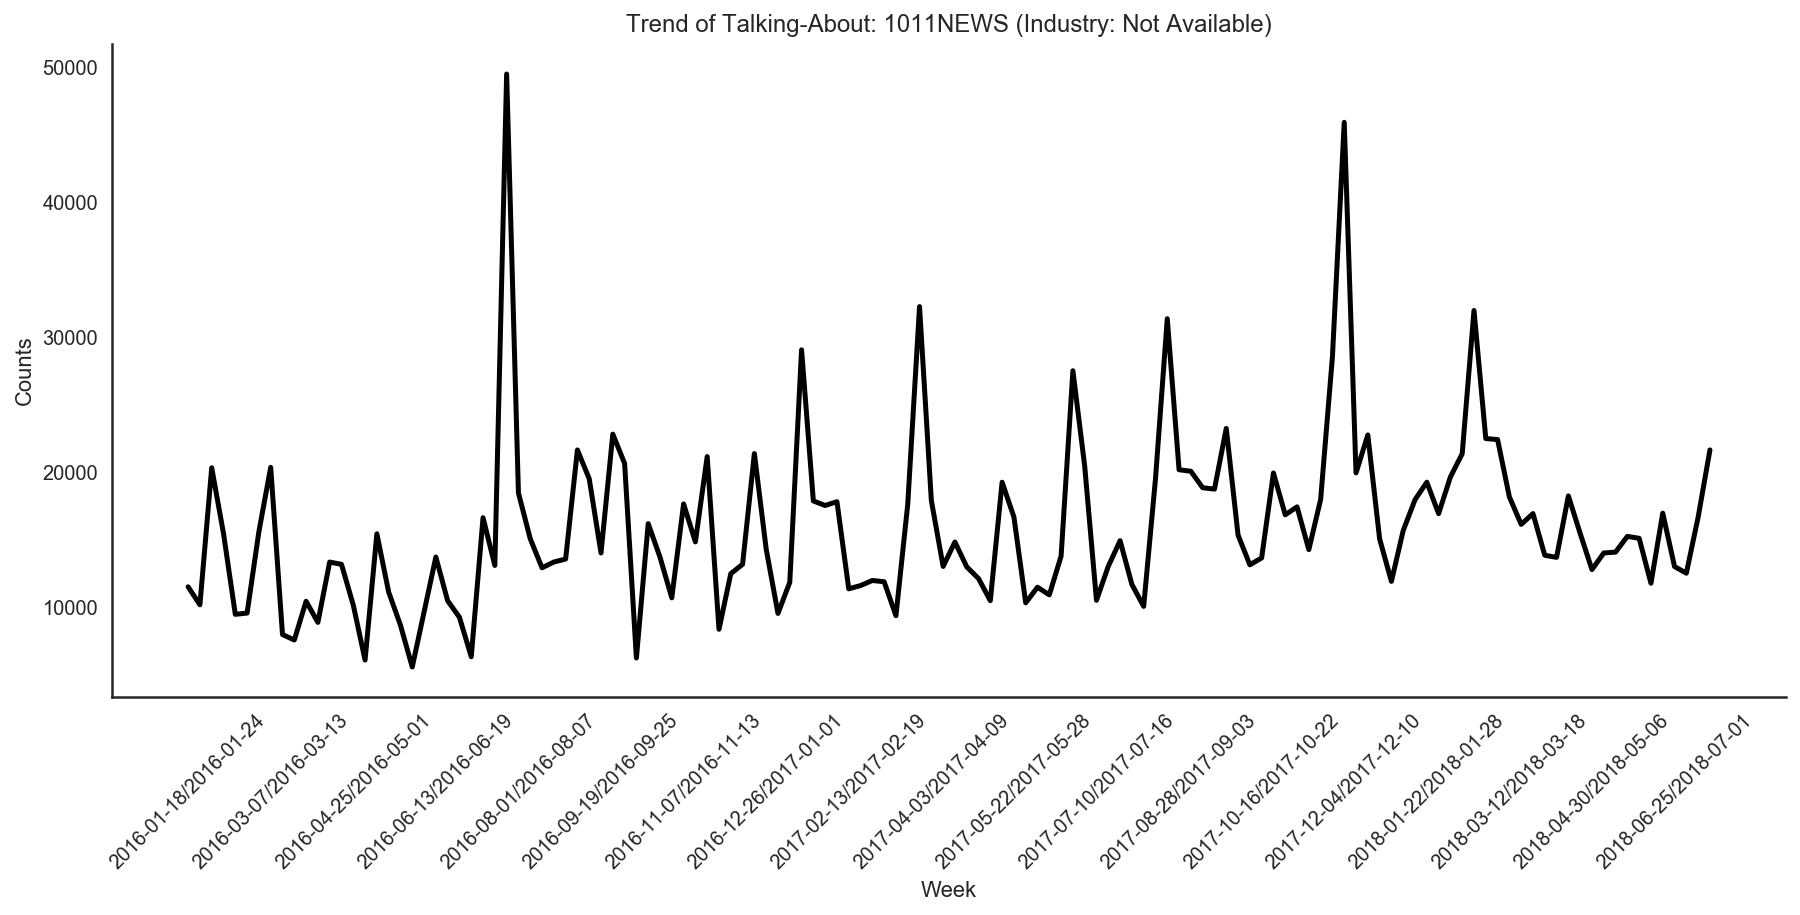

In [301]:
user_list_temp = facebook3['user'].value_counts().sort_index().index.tolist()
interact(tdi.social_trend, 
                    company = user_list_temp,
                    interaction = ['Talking-About','Check-Ins','Likes','Were-Here'],
                    by = ['Week','Day','Month','Quarter','Year'],
                    compare = False,
                    compare_by = ['Industry','Cluster','Form'],
                    percentage_change = False,
                    data = fixed(facebook3))

------

### Focus on Some Industries

In [16]:
tdi.focus_industry

['Business Services',
 'Communications',
 'Miscellaneous Retail',
 'Food and Kindred Products',
 'Eating and Drinking Places',
 'Apparel, Finished Products from Fabrics & Similar Materials',
 'Apparel and Accessory Stores',
 'Insurance Carriers',
 'Food Stores',
 'Wholesale Trade - Nondurable Goods',
 'Transportation Services',
 'Real Estate',
 'Hotels, Rooming Houses, Camps, and Other Lodging Places',
 'Transportation by Air',
 'Motion Pictures',
 'Health Services',
 'Amusement and Recreation Services']

In [17]:
good = facebook3['industry_short'].isin(tdi.focus_industry)
facebook4 = facebook3[good]

In [18]:
facebook4.shape

(224584, 32)

### ipywidgets: Allow interactively selecting company, interaction type, and time interval to look at a trend
(became static when uploaded to github)

In [41]:
facebook4 = pd.read_csv('./RShiny/facebook4.csv')

In [42]:
facebook4['time_2'] = pd.to_datetime(facebook4['time_2'])
facebook4['date_updated_2'] = pd.to_datetime(facebook4['date_updated_2'])

In [43]:
facebook4.columns

Index(['dataset_id', 'facebook_id', 'username', 'user', 'checkins',
       'were_here_count', 'likes', 'talking_about_count', 'time_2',
       'date_updated_2', 'gvkey', 'conm', 'tic', 'cusip', 'cik', 'sic',
       'naics', 'year1', 'year2', 'name_cleaned', 'diff1', 'diff2',
       'match_status', 'sic_2digit', 'industry_short', 'A', 'W', 'Q', 'D', 'M',
       'virtual', 'virtual_c', 'time_period', 'cluster'],
      dtype='object')

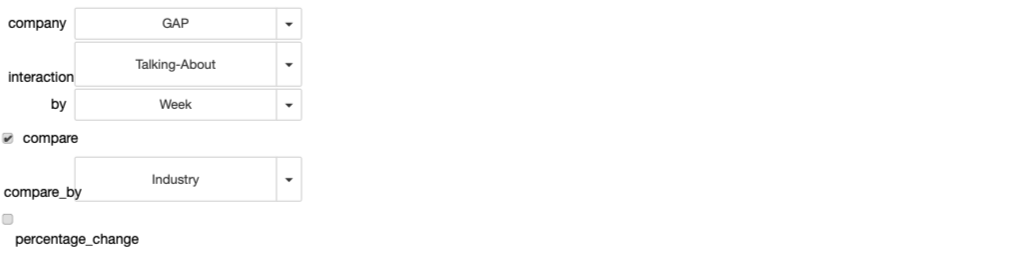

/Users/abbypro/Dropbox/05Job/TDI/tdi.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_ind['time_period'] = df_ind[p]


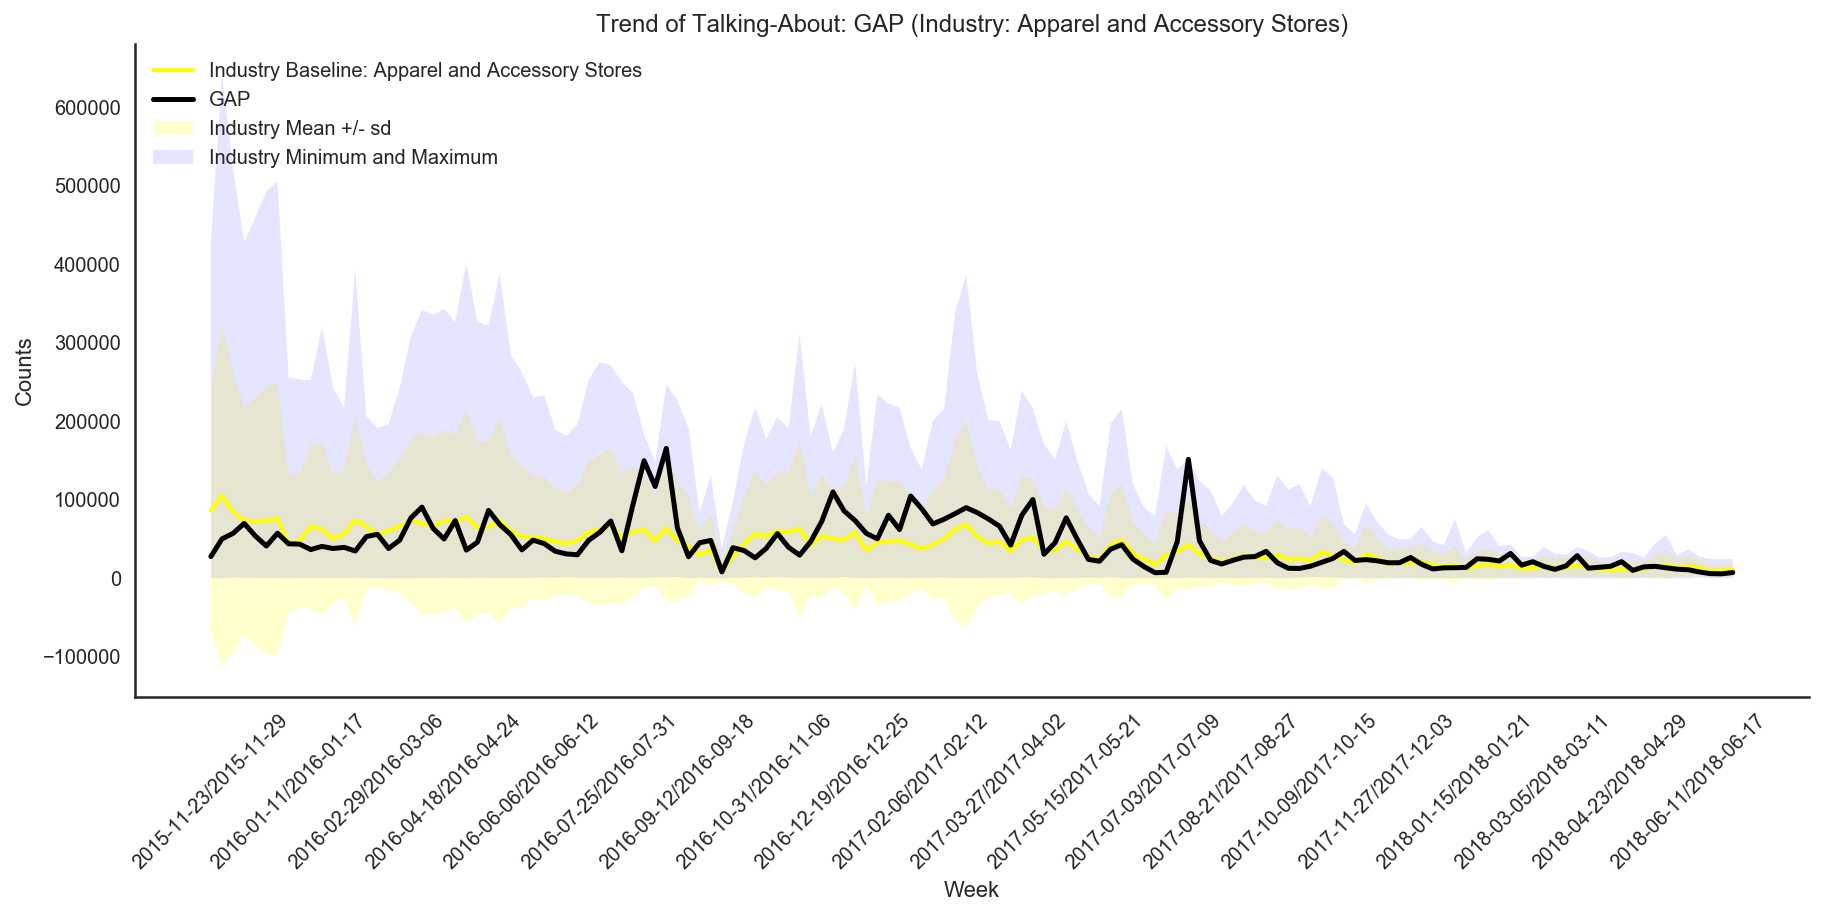

In [47]:
user_list_temp = facebook4['user'].value_counts().sort_index().index.tolist()
interact(tdi.social_trend, 
                    company = user_list_temp,
                    interaction = ['Talking-About','Check-Ins','Likes','Were-Here'],
                    by = ['Week','Day','Month','Quarter','Year'],
                    compare = False,
                    compare_by = ['Industry','Cluster','Form'],
                    percentage_change = False,
                    data = fixed(facebook4))

https://abigailzeng.shinyapps.io/RShiny/

------

## Looking at Volatility and Growth of Social Media Performance
#### Coefficient of Variance, Percentage Change and Other Statistics

In [19]:
# get statistics at daily level
df_stats, df_bytime = tdi.company_summary(facebook3,'D')

In [20]:
del df_bytime

In [21]:
df_stats.shape

(4891, 25)

In [22]:
user_industry = facebook3.sort_values('user').drop_duplicates('user')[['user','sic','industry_short']]

In [23]:
df_stats = df_stats.merge(user_industry)

In [24]:
df_stats = df_stats.replace([np.inf, -np.inf], np.nan)

In [25]:
df_stats.set_index('user', inplace = True)

------

### Volatility of Four Activities

--------------------------------------------------------------------------------
Check-Ins: Most Volatile Company: SEALYMATTRESS
Check-Ins: Least Volatile Company: 105.7WROR
--------------------------------------------------------------------------------
Talking-About: Most Volatile Company: FORTRESSBIOTECH
Talking-About: Least Volatile Company: NTELOSWIRELESS
--------------------------------------------------------------------------------
Were-Here: Most Volatile Company: UNITIL
Were-Here: Least Volatile Company: ABEONABIO
--------------------------------------------------------------------------------
Likes: Most Volatile Company: FORTRESSBIOTECH
Likes: Least Volatile Company: ALLIEDHPI


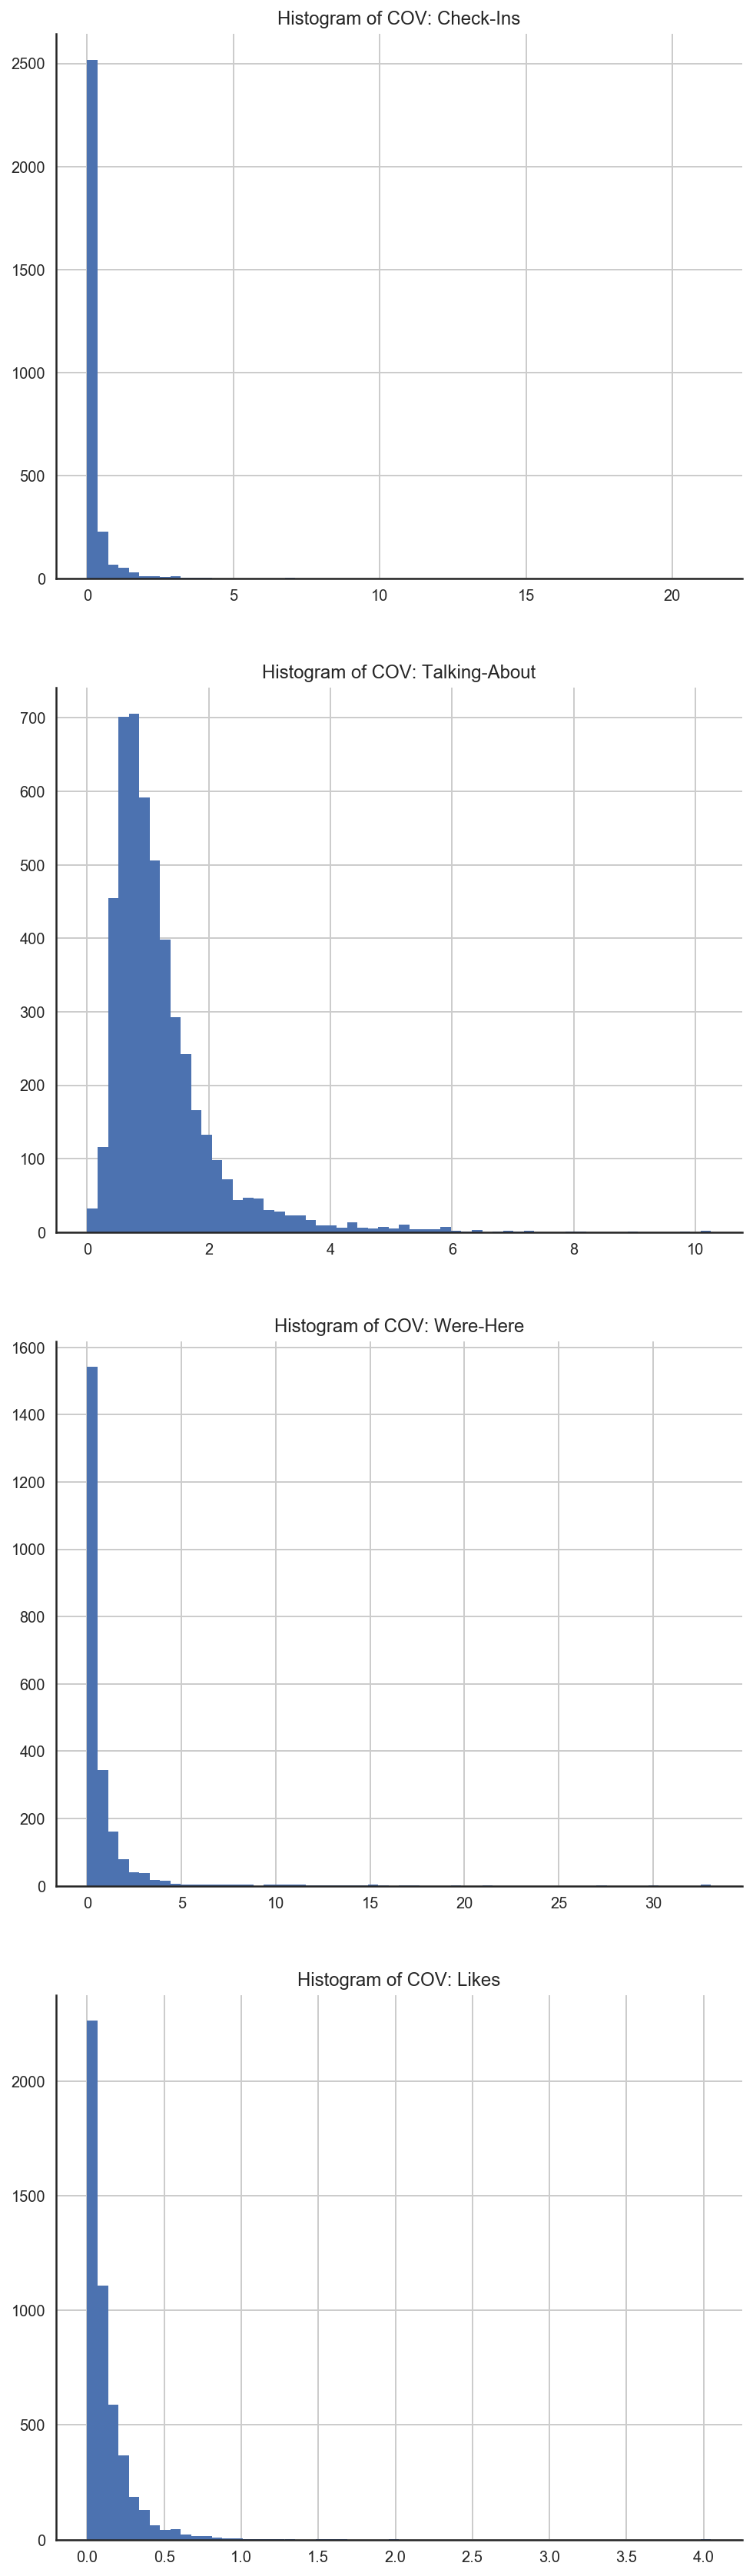

In [36]:
## Look at 

data = df_stats.copy()

fig = plt.figure(figsize = (8,30))
idx = 1
for i in list(tdi.interactions.keys()):
    col = tdi.interactions.get(i)+'_cov'
    string1 = '{0}: Most Volatile Company: {1}'.format(i,data[col].idxmax())
    string2 = '{0}: Least Volatile Company: {1}'.format(i,data[col].idxmin())
    print('--'*40)
    print(string1)
    print(string2)

    ax = fig.add_subplot(4, 1, idx)
    ax = data[col].hist(bins=60)
    ax.set_title('Histogram of COV: {0}'.format(i))
    sns.despine()
    idx = idx+1
    
del data

### Growth of Four Activities

--------------------------------------------------------------------------------
Check-Ins: Most Increased Company: BOYDGAMING
Check-Ins: Least Increased Company: DUNKINDONUTS
--------------------------------------------------------------------------------
Talking-About: Most Increased Company: SISTERSCHUBERTS
Talking-About: Least Increased Company: NAPWHQ
--------------------------------------------------------------------------------
Were-Here: Most Increased Company: SPPLUSCORP
Were-Here: Least Increased Company: ORIONGAZETTE
--------------------------------------------------------------------------------
Likes: Most Increased Company: CONCENTRIXJAPAN
Likes: Least Increased Company: BLACKBERRY


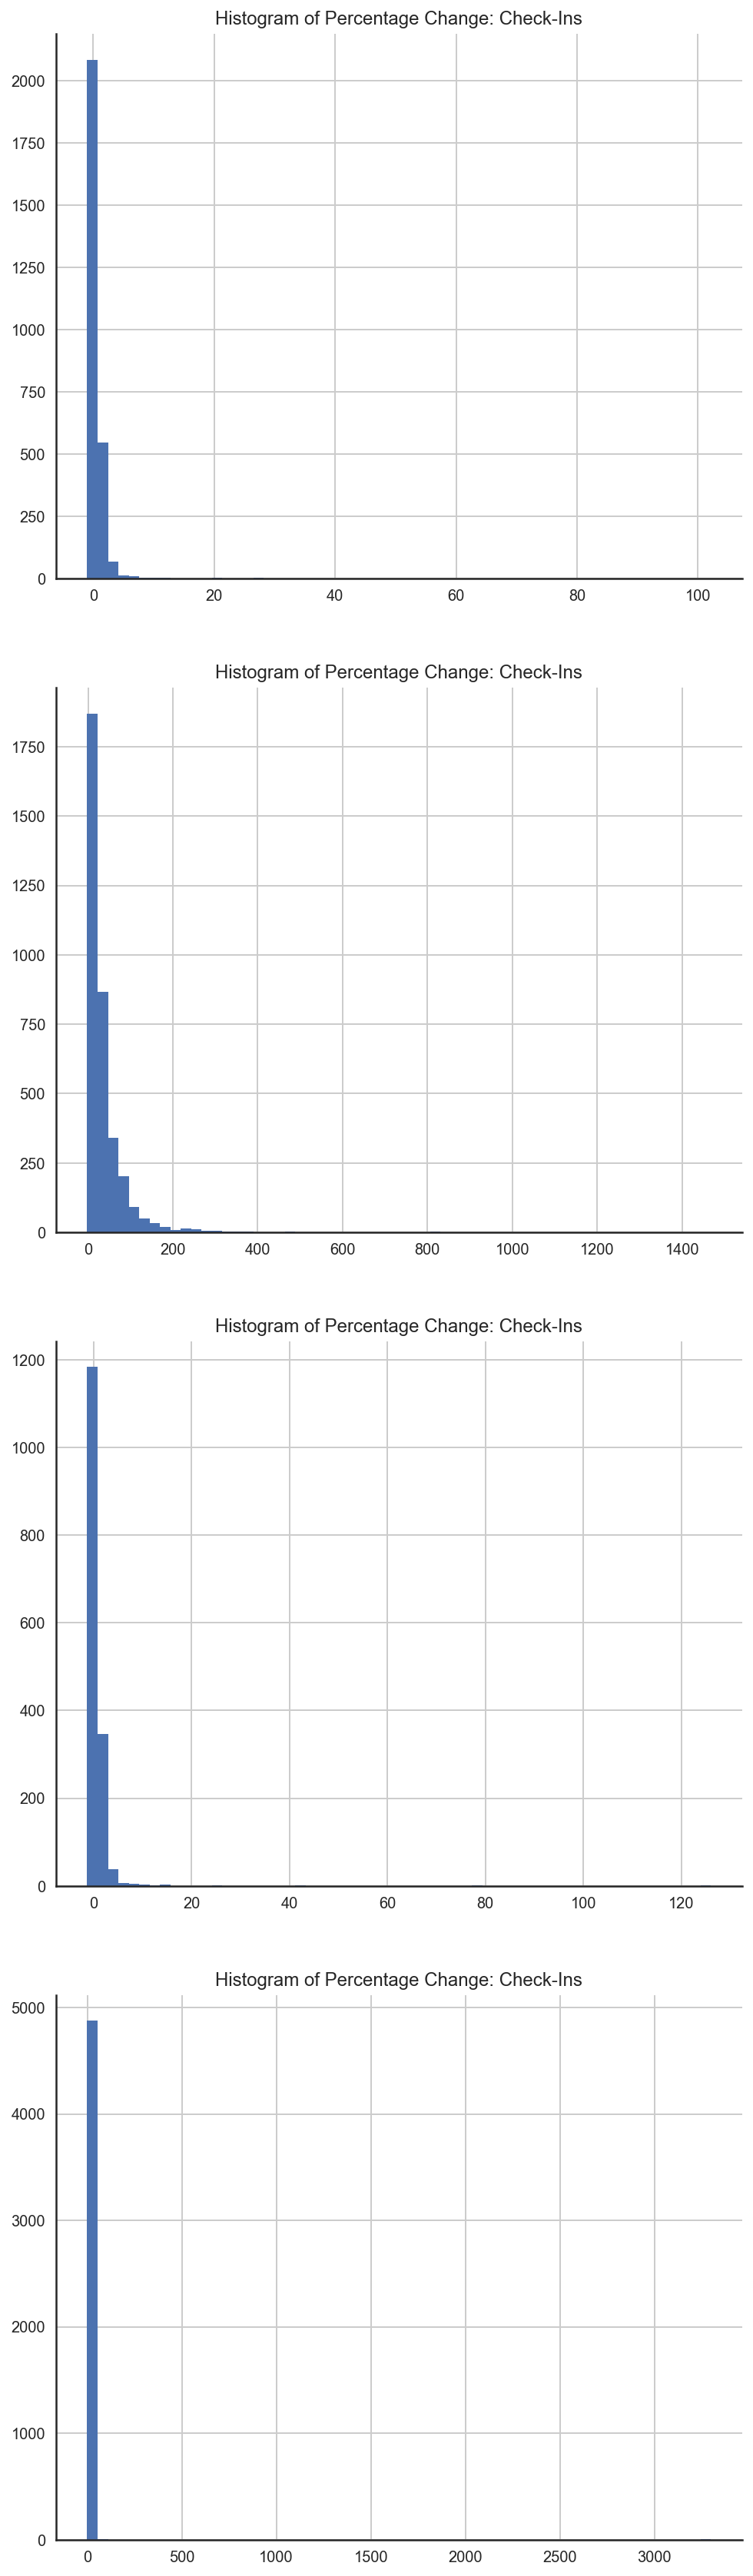

In [37]:
data = df_stats.copy()

fig = plt.figure(figsize = (8,30))

idx = 1
for i in list(tdi.interactions.keys()):
    col = tdi.interactions.get(i)+'_inc'
    string1 = '{0}: Most Increased Company: {1}'.format(i,data[col].idxmax())
    string2 = '{0}: Least Increased Company: {1}'.format(i,data[col].idxmin())
    print('--'*40)
    print(string1)
    print(string2)

    ax = fig.add_subplot(4, 1, idx)
    data[col].replace([np.inf, -np.inf], np.nan, inplace = True)
    ax = data[col].hist(bins=60)
    ax.set_title('Histogram of Percentage Change: {0}'.format(key))
    sns.despine()
    idx += 1
    
del data

------

### Winner Companies

In [38]:
#focus_industry

In [31]:
good = df_stats['industry_short'].isin(tdi.focus_industry)
top50_vol = df_stats[good]['talking_about_count_cov'].sort_values(ascending = False)[0:50]

In [32]:
df_top50_vol = df_stats.loc[top50_vol.index,['industry_short','talking_about_count_cov']]

In [33]:
top50_inc = df_stats[good]['checkins_inc'].sort_values(ascending = False)[0:50]

In [34]:
df_top50_inc = df_stats.loc[top50_inc.index,['industry_short','checkins_inc']]

In [21]:
cmap = plt.cm.tab20
colors = {}
for idx, ind in enumerate(tdi.focus_industry):
    colors[ind] = rgb2hex(cmap(idx))

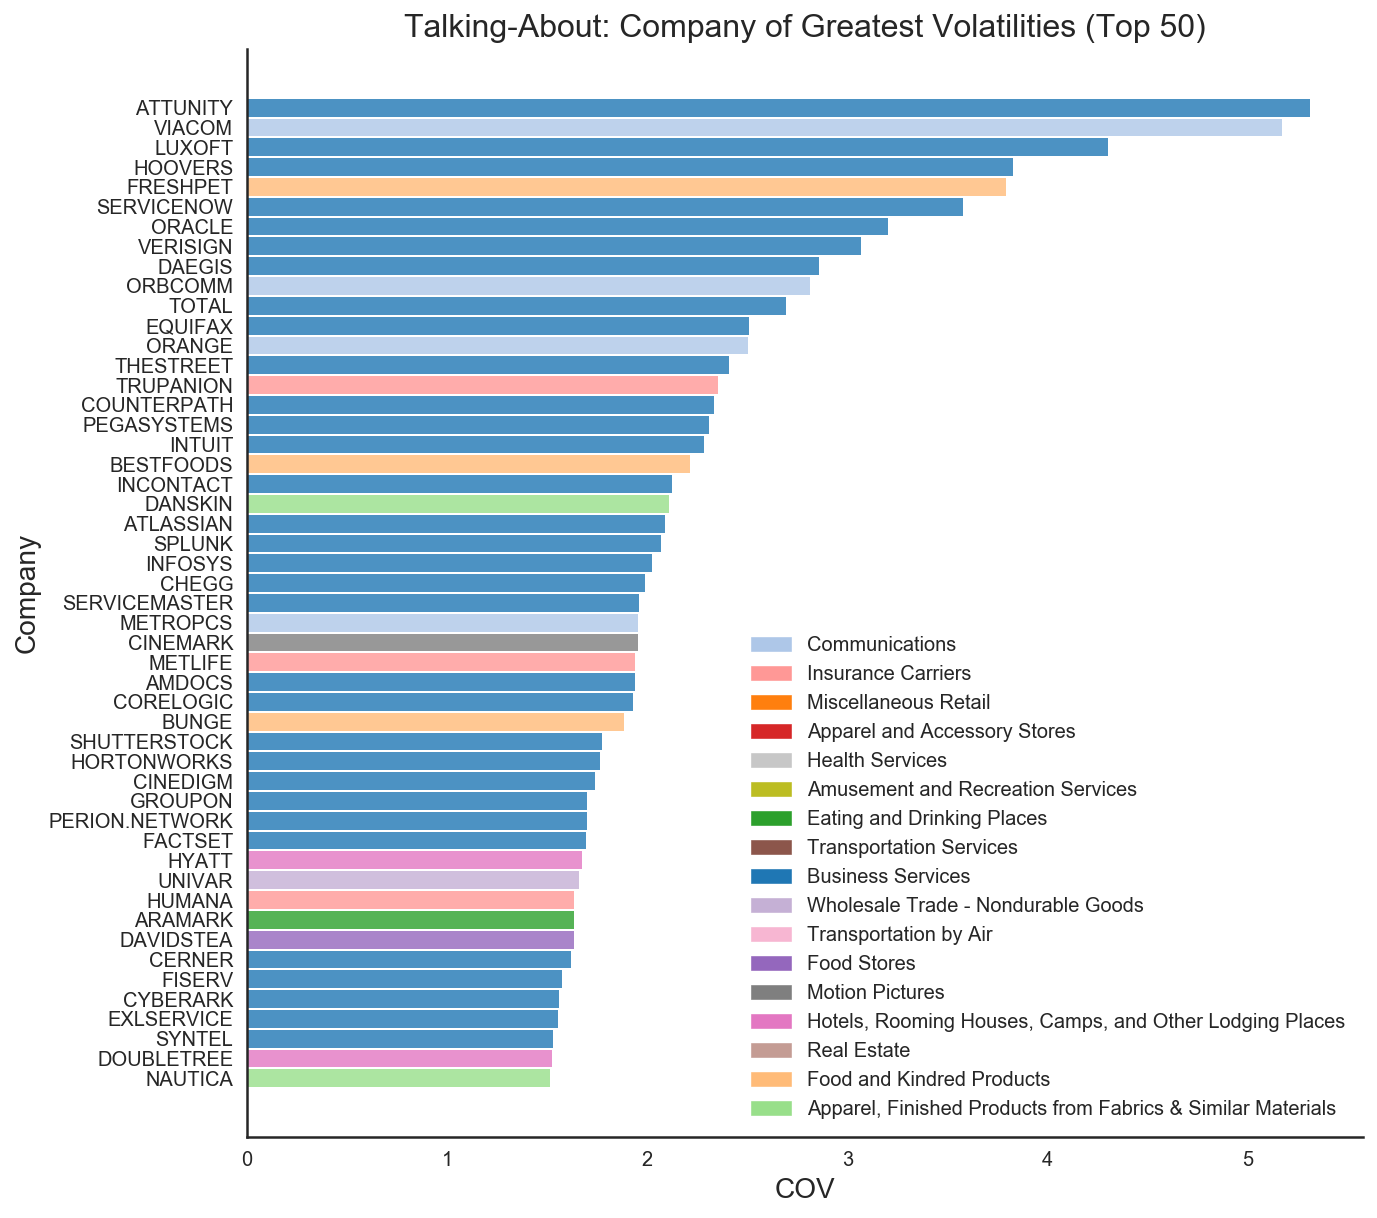

In [29]:
# visualization

fig, ax = plt.subplots(figsize = (10,10))
x = df_top50_vol['talking_about_count_cov'][::-1]
N = len(x)
y = list(range(N))
y_ticks = [i for i in y]
ind = df_top50_vol['industry_short'].values.tolist()
ind_colors = [colors[i] for i in ind][::-1]

ax.barh(y,x,
        color = ind_colors, height = 0.9, alpha = 0.8)
ax.set_yticks(y_ticks)
ax.set_yticklabels(df_top50_vol.index.tolist()[::-1])
ax.set_title('Talking-About: Company of Greatest Volatilities (Top 50)', fontsize = 16)
ax.set_ylabel('Company',fontsize = 14)
ax.set_xlabel('COV', fontsize = 14)
handle = []
for key, value in colors.items():
    p = mpatches.Patch(color=value, label=key)
    handle.append(p)
plt.legend(handles=handle, loc=4)
sns.despine()

#plt.savefig('cov_50.png',dpi=500)
#plt.close(fig) 

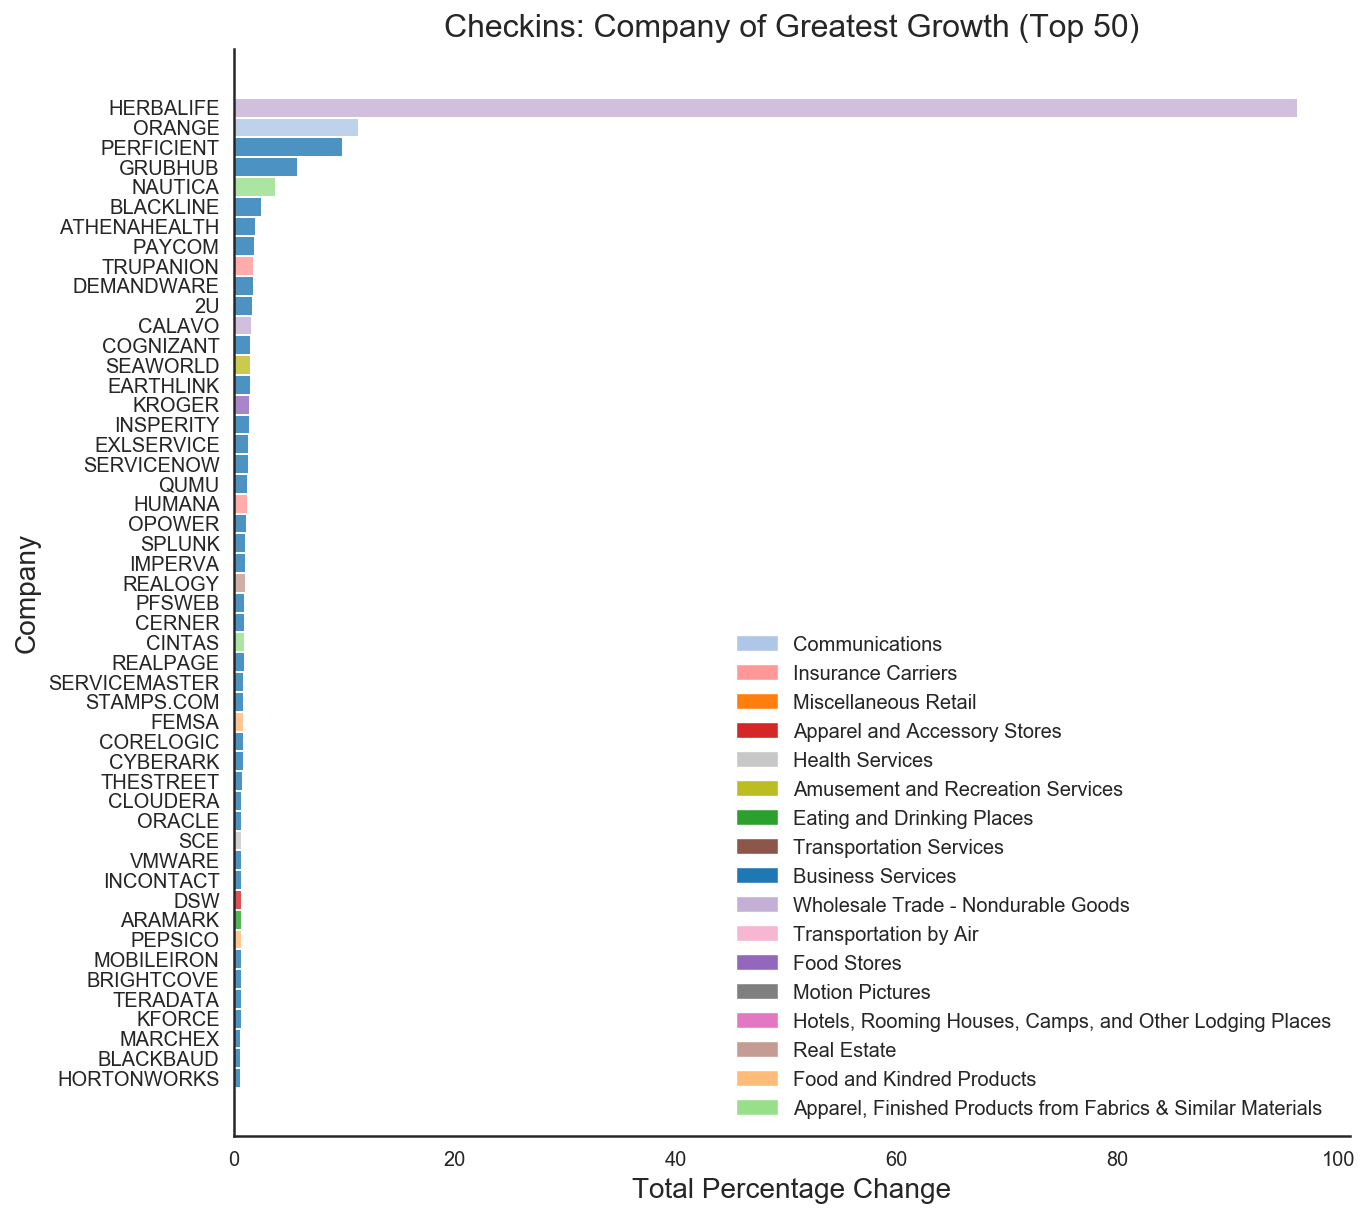

In [40]:
# visualization

fig, ax = plt.subplots(figsize = (10,10))
x = df_top50_inc['checkins_inc'][::-1]
N = len(x)
y = list(range(N))
y_ticks = [i for i in y]
ind = df_top50_inc['industry_short'].values.tolist()
ind_colors = [colors[i] for i in ind][::-1]

ax.barh(y,x,
        color = ind_colors, height = 0.9, alpha = 0.8)
ax.set_yticks(y_ticks)
ax.set_yticklabels(df_top50_inc.index.tolist()[::-1])
ax.set_title('Checkins: Company of Greatest Growth (Top 50)', fontsize = 16)
ax.set_ylabel('Company',fontsize = 14)
ax.set_xlabel('Total Percentage Change', fontsize = 14)

handle = []
for key, value in colors.items():
    p = mpatches.Patch(color=value, label=key)
    handle.append(p)
plt.legend(handles=handle, loc=4)
sns.despine()
#plt.savefig('inc_50.png',dpi=500)
#plt.close(fig) 

------

### Winner Companies in Each Industry

In [46]:
selected_cols = tdi.notime_cols+['virtual']

In [47]:
df_notime = facebook3[selected_cols].drop_duplicates('user')

In [48]:
df_notime = df_notime.merge(df_stats.reset_index())

In [49]:
df_notime.shape

(4891, 38)

In [50]:
df_notime.set_index('user',inplace = True)

In [51]:
df_cov = df_notime.groupby(['industry_short'])['talking_about_count_cov'].agg({'max','idxmax'}).reset_index()

In [52]:
good = df_cov['industry_short'].isin(tdi.focus_industry)
df_cov_f = df_cov[good].sort_values('max', ascending = False)

In [53]:
del df_cov

In [54]:
df_cov_f.set_index('industry_short', inplace = True)

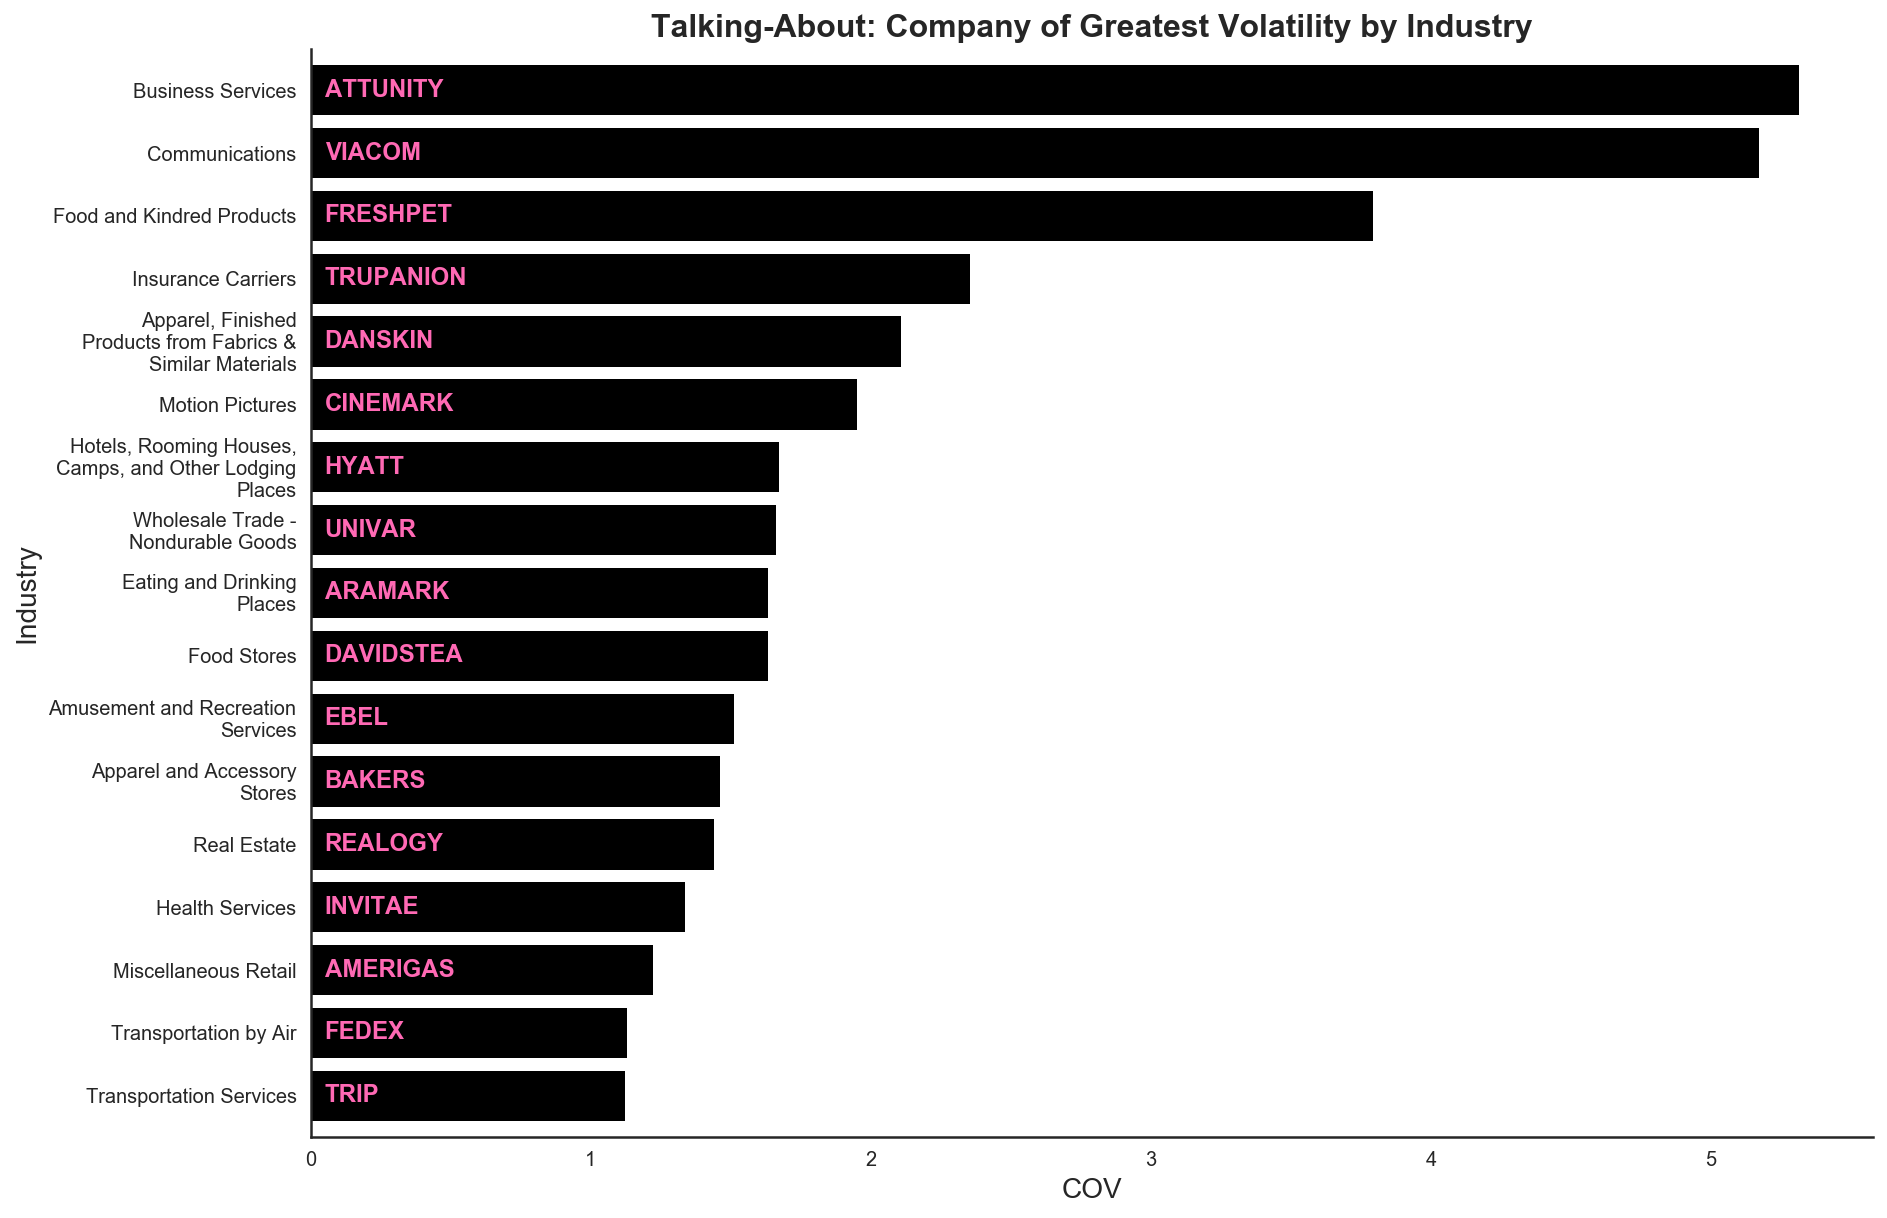

In [93]:
# visualization

bardata = df_cov_f['max'][::-1]
labels = df_cov_f['idxmax'][::-1].values.tolist()
yticks = df_cov_f.index[::-1].tolist()
yticks = [ '\n'.join(wrap(l, 25)) for l in  yticks]

fig, ax = plt.subplots(figsize=(14,10))
bardata.plot.barh(color = 'black', width = 0.8)
plt.title("Talking-About: Company of Greatest Volatility by Industry", fontsize = 16, fontweight='bold')
plt.ylabel("Industry", fontsize = 14)
plt.xlabel("COV",fontsize = 14)

ax.set_yticklabels(yticks)
virtual = facebook3[facebook3.virtual == 1]['user'].unique().tolist()
for i, v in enumerate(labels):
    if v in virtual:
        plt.text(0.05,i, labels[i], color='hotpink', va='center', fontweight='bold')
    else:
        plt.text(0.05,i, labels[i], color='hotpink', va='center', fontweight='bold')
sns.despine()
#plt.savefig('cov_byind.png',dpi=500)
#plt.close(fig)

In [57]:
col = 'checkins'
df_notime[col+'_inc'].replace([np.inf, -np.inf], np.nan, inplace = True)
df_inc = df_notime.groupby(['industry_short'])[col+'_inc'].agg({'max','idxmax'}).reset_index()

In [58]:
good = df_inc['industry_short'].isin(tdi.focus_industry)
df_inc_f = df_inc[good].sort_values('max', ascending = False)
df_inc_f.set_index('industry_short', inplace = True)

In [59]:
del df_inc

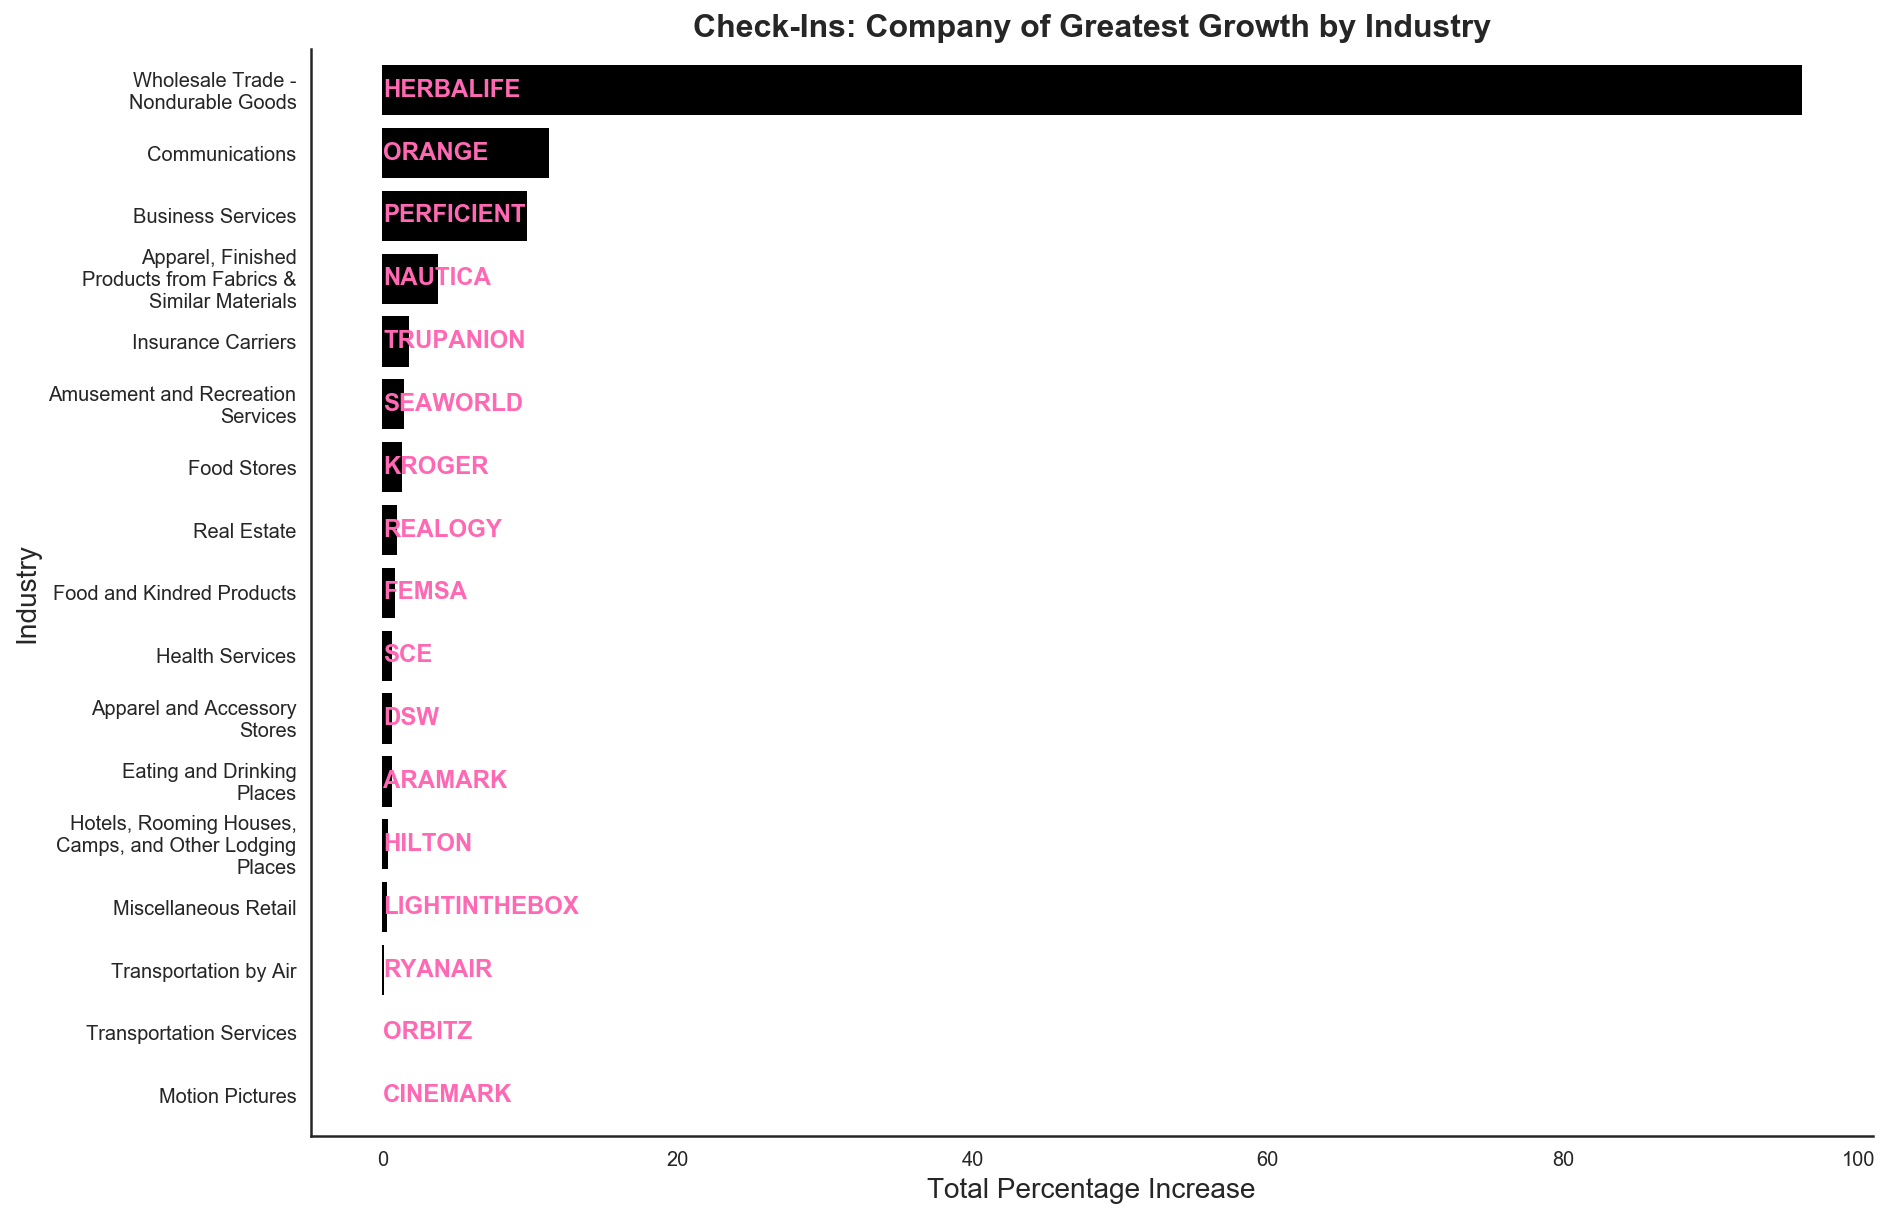

In [60]:
# visualization

bardata = df_inc_f['max'][::-1]
labels = df_inc_f['idxmax'][::-1].values.tolist()
yticks = df_inc_f.index[::-1].tolist()
yticks = [ '\n'.join(wrap(l, 25)) for l in  yticks]

fig, ax = plt.subplots(figsize=(14,10))
bardata.plot.barh(color = 'black', width = 0.8)
plt.title("Check-Ins: Company of Greatest Growth by Industry", fontsize = 16,fontweight='bold')
plt.ylabel("Industry", fontsize = 14)
plt.xlabel("Total Percentage Increase", fontsize = 14)

ax.set_yticklabels(yticks)

for i, v in enumerate(labels):
    if v in virtual:
        plt.text(0.05,i, labels[i], color='coral', va='center', fontweight='bold')
    else:
        plt.text(0.05,i, labels[i], color='hotpink', va='center', fontweight='bold')

sns.despine()

## Clustering
### Types of Different Companies in terms of their social media performance

In [61]:
selected_features_all = [
       'checkins_cov',
       'were_here_count_cov', 'likes_cov', 'talking_about_count_cov',
       'checkins_mean', 'checkins_count', 'checkins_std', 'checkins_max',
       'were_here_count_mean', 'were_here_count_count', 'were_here_count_std',
       'were_here_count_max', 'likes_mean', 'likes_count', 'likes_std',
       'likes_max', 'talking_about_count_mean', 'talking_about_count_count',
       'talking_about_count_std', 'talking_about_count_max', 'checkins_inc',
       'were_here_count_inc', 'likes_inc', 'talking_about_count_inc']

In [62]:
missing = df_notime[selected_features_all].isnull().sum()

In [63]:
missing

checkins_cov                 1926
were_here_count_cov          2580
likes_cov                      13
talking_about_count_cov        15
checkins_mean                   0
checkins_count                  0
checkins_std                   13
checkins_max                    0
were_here_count_mean            0
were_here_count_count           0
were_here_count_std            13
were_here_count_max             0
likes_mean                      0
likes_count                     0
likes_std                      13
likes_max                       0
talking_about_count_mean        0
talking_about_count_count       0
talking_about_count_std        13
talking_about_count_max         0
checkins_inc                 2151
were_here_count_inc          3300
likes_inc                      13
talking_about_count_inc      1353
dtype: int64

-----

### General Clusters

In [64]:
selected_features = [
       'likes_cov',
       'likes_inc',
       'likes_std',
       'likes_mean',
       'talking_about_count_cov', 
       'talking_about_count_std', 
       'talking_about_count_mean',
        ]

In [65]:
df_cls = df_notime[selected_features].replace([np.inf, -np.inf], np.nan)
df_cls.dropna(inplace=True)

In [66]:
df_notime.shape[0]-df_cls.shape[0]

15

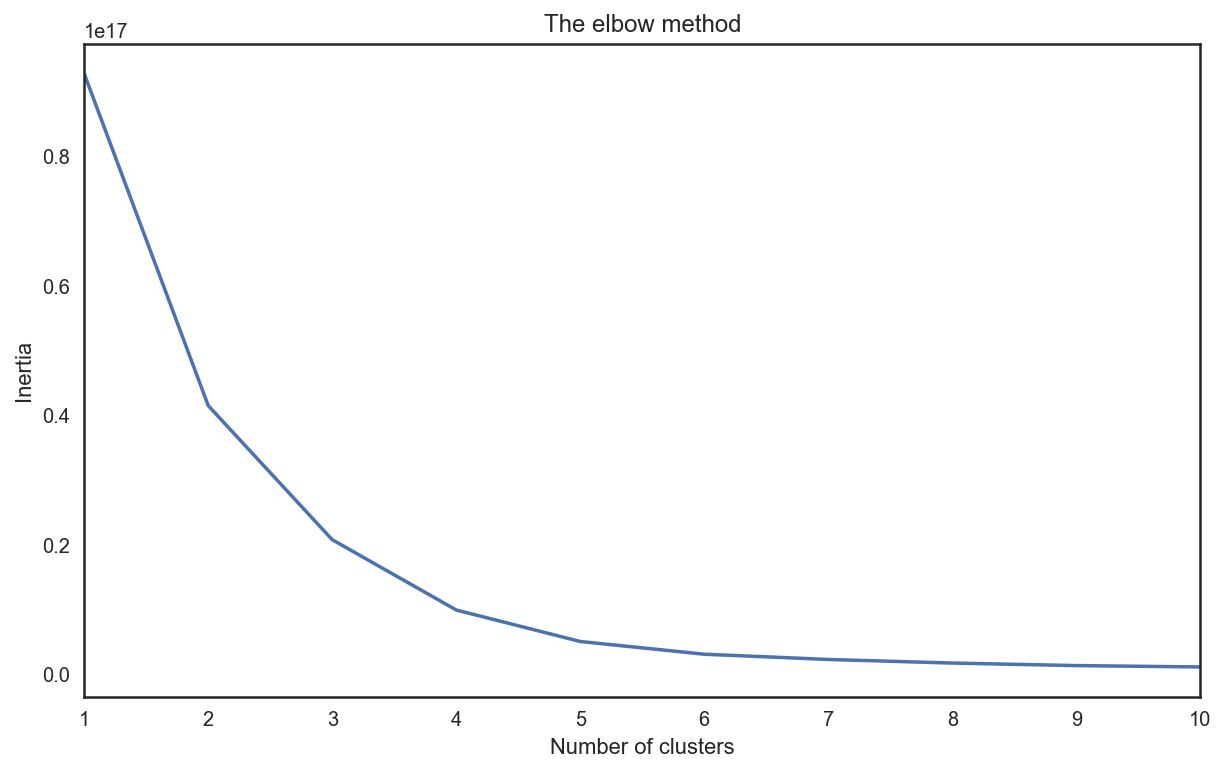

In [67]:
inertia = tdi.plot_inertia(df_cls)

In [68]:
k_means, clusters = tdi.cluster(df_cls, random_state=check_random_state(1), n_clusters=5)

In [69]:
df_cls['cluster'] = clusters

In [70]:
df_cls['cluster'].value_counts()

0    4741
4     105
1      23
3       6
2       1
Name: cluster, dtype: int64

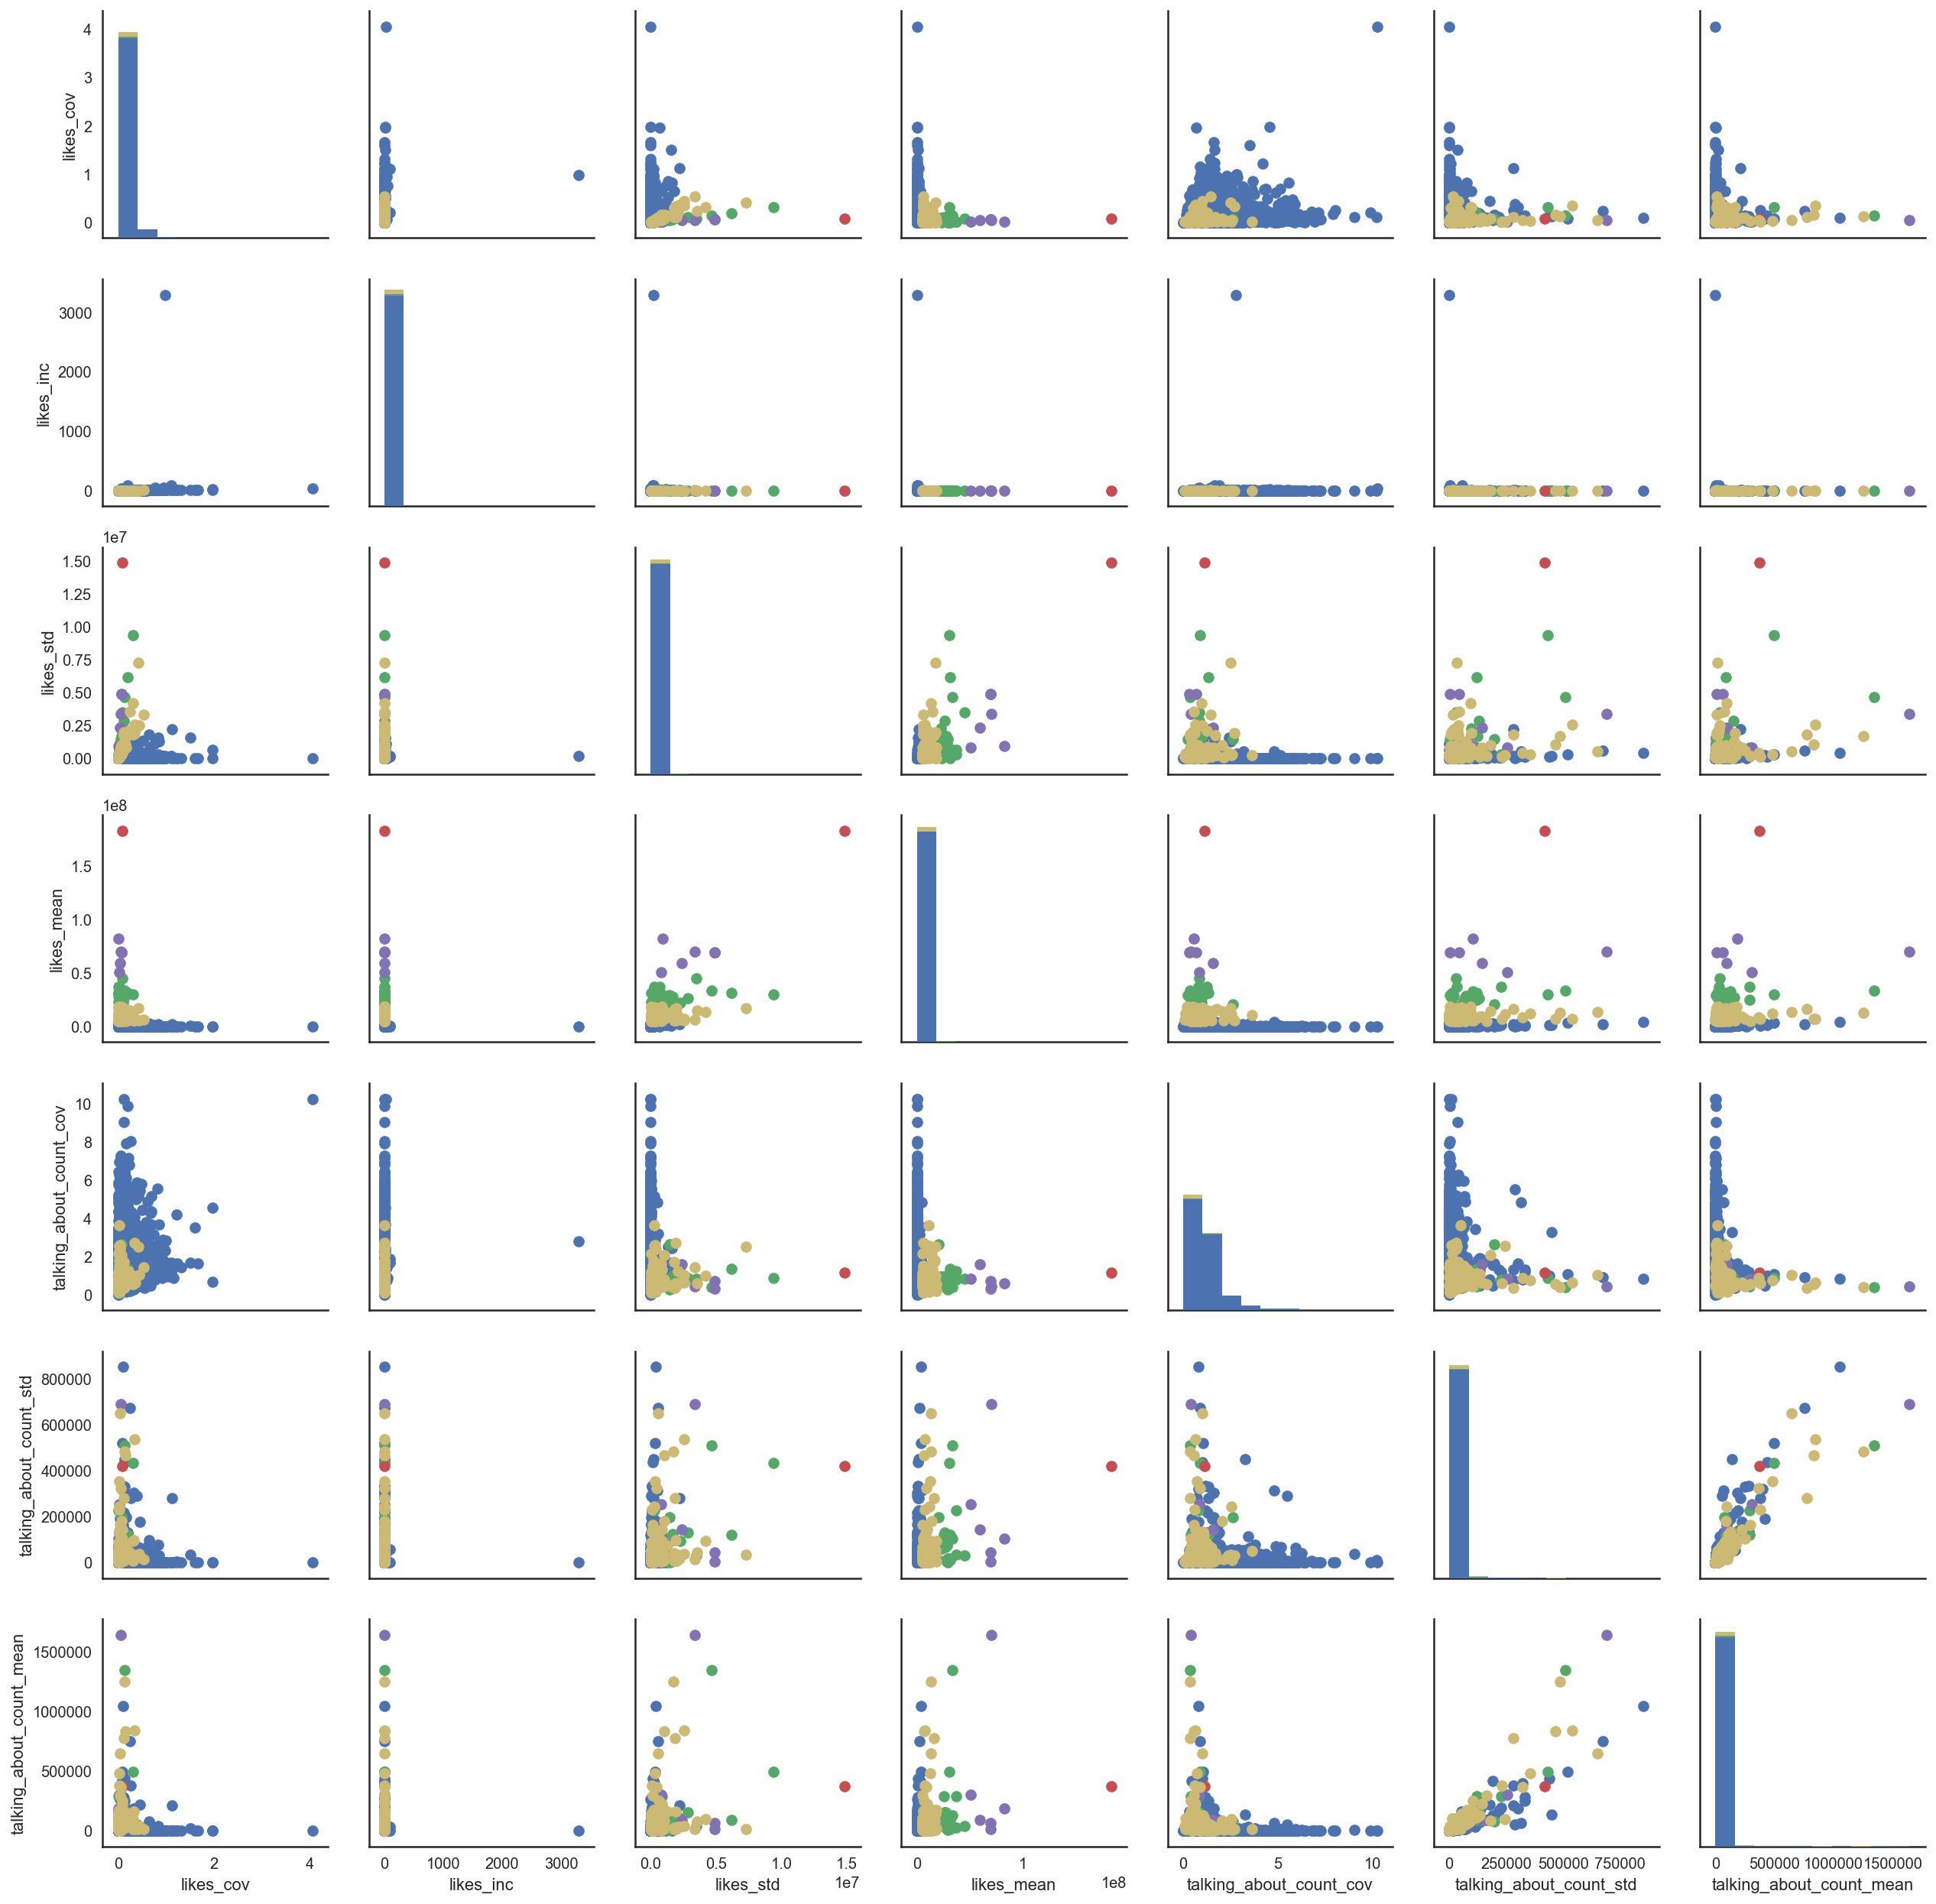

In [71]:
selected_cols = selected_features[0:8]
pg = tdi.plot_pair(df_cls, clusters, cols = selected_cols)

In [72]:
good = df_cls['cluster'] == 1
df_cls[good].index.tolist()

['AMAZON',
 'BLACKBERRY',
 'CHEVROLET',
 'GOOGLE',
 'INTEL',
 'ITUNES',
 'ITUNESUS',
 'KFC',
 'KSCLEANMASTER',
 'MARVEL',
 'MONSTERENERGY',
 'NETFLIX',
 'NIKE',
 'PEPSIUS',
 'PIZZAHUT',
 'SKYPE',
 'STARBUCKS',
 'TARGET',
 'VICTORIASSECRET',
 'VISAUNITEDSTATES',
 'WALMART',
 'WWE',
 'XBOX']

In [73]:
good = df_cls['cluster'] == 2
df_cls[good].index.tolist()

['FACEBOOK']

In [74]:
good = df_cls['cluster'] == 3
df_cls[good].index.tolist()

['DISNEY',
 'MANCHESTERUNITED',
 'MCDONALDS',
 'MCDONALDSUS',
 'NATGEOTVUS',
 'YOUTUBE']

In [75]:
good = df_cls['cluster'] == 4
df_cls[good].index.tolist()

['ABERCROMBIE',
 'AMCTHEATRES',
 'AMERICANEAGLE',
 'AMERICANEXPRESSUS',
 'APPLEBEES',
 'APPSTORE',
 'ATT',
 'AVON',
 'BATHANDBODYWORKS',
 'BESTBUY',
 'BET',
 'BOOKINGCOM',
 'BOOKINGCOMUS',
 'BRADESCO',
 'BURGERKING',
 'CALVINKLEIN',
 'CLINIQUEUS',
 'CLOSEUP',
 'COLLEGEHUMOR',
 'DISNEYLAND',
 'DOMINOS',
 'DORITOSUSA',
 'DUNKINDONUTS',
 'EROSNOW',
 'ESPN',
 'EXPEDIA',
 'FISHERPRICE',
 'FOOTLOCKER',
 'FORD',
 'FOXDEPORTES',
 'FOXSPORTS',
 'GAMESTOP',
 'GAP',
 'GATORADE',
 'GOOGLECHROME',
 'GOPRO',
 'GROUPON',
 'GUESS',
 'HARLEY-DAVIDSON',
 'HEADANDSHOULDERS',
 'HEADANDSHOULDERSUSA',
 'HELADOSHOLANDA',
 'HELLMANNS',
 'HERSHEYS',
 'HOLLISTER',
 'ICICIBANK',
 'ITAU',
 'JCP',
 'JEEP',
 'JOHNSONSBABY',
 'KOHLS',
 'MACCOSMETICS',
 'MACYS',
 'MASERATI',
 'MASTERCARDUS',
 'MERCADOLIBRE',
 'MICHAELKORS',
 'MICROSOFT',
 'MOUNTAINDEW',
 'MSN',
 'NAUTICA',
 'NAUTICAUSA',
 'NETSHOES',
 'NOKIA',
 'NYTIMES',
 'OLAYUS',
 'OLDNAVY',
 'OLIVEGARDEN',
 'ORANGE',
 'PAMPERS',
 'PANDORA',
 'PARAMOUNT',
 'PAYPAL

In [76]:
df_cls_result = df_cls.reset_index()[['cluster','user']]

In [77]:
df_cls_result['cluster'] = df_cls_result['cluster'].astype('int')+1

In [78]:
facebook3 = facebook3.merge(df_cls_result, how = 'left')

In [81]:
df_notime = df_notime.reset_index().merge(df_cls_result, how = 'left')

In [85]:
#df_notime.head()

In [82]:
#df_notime.to_csv('df_notime.csv', index=None)

-----

### Virtual v.s. Physical

In [158]:
df_v=df_notime[df_notime.virtual == 1]

In [159]:
df_p=df_notime[df_notime.virtual != 1]

In [160]:
df_v.shape

(1624, 37)

In [161]:
df_p.shape

(3267, 37)

In [172]:
missing = df_v[selected_features_all].isnull().sum()

In [173]:
missing

checkins_cov                 1624
were_here_count_cov          1624
likes_cov                       3
talking_about_count_cov         4
checkins_mean                   0
checkins_count                  0
checkins_std                    3
checkins_max                    0
were_here_count_mean            0
were_here_count_count           0
were_here_count_std             3
were_here_count_max             0
likes_mean                      0
likes_count                     0
likes_std                       3
likes_max                       0
talking_about_count_mean        0
talking_about_count_count       0
talking_about_count_std         3
talking_about_count_max         0
checkins_inc                 1624
were_here_count_inc          1624
likes_inc                       3
talking_about_count_inc       449
dtype: int64

In [174]:
missing = df_p[selected_features_all].isnull().sum()

In [175]:
missing

checkins_cov                  302
were_here_count_cov           956
likes_cov                      10
talking_about_count_cov        11
checkins_mean                   0
checkins_count                  0
checkins_std                   10
checkins_max                    0
were_here_count_mean            0
were_here_count_count           0
were_here_count_std            10
were_here_count_max             0
likes_mean                      0
likes_count                     0
likes_std                      10
likes_max                       0
talking_about_count_mean        0
talking_about_count_count       0
talking_about_count_std        10
talking_about_count_max         0
checkins_inc                  527
were_here_count_inc          1676
likes_inc                      10
talking_about_count_inc       904
dtype: int64

-----

In [176]:
selected_features = [
       'likes_cov',
       'likes_inc',
       'likes_std',
       #'likes_mean',
       'talking_about_count_cov', 
       'talking_about_count_std', 
       #'talking_about_count_mean',
        ]

In [177]:
df_cls_v = df_v[selected_features].replace([np.inf, -np.inf], np.nan)
df_cls_v.dropna(inplace=True)

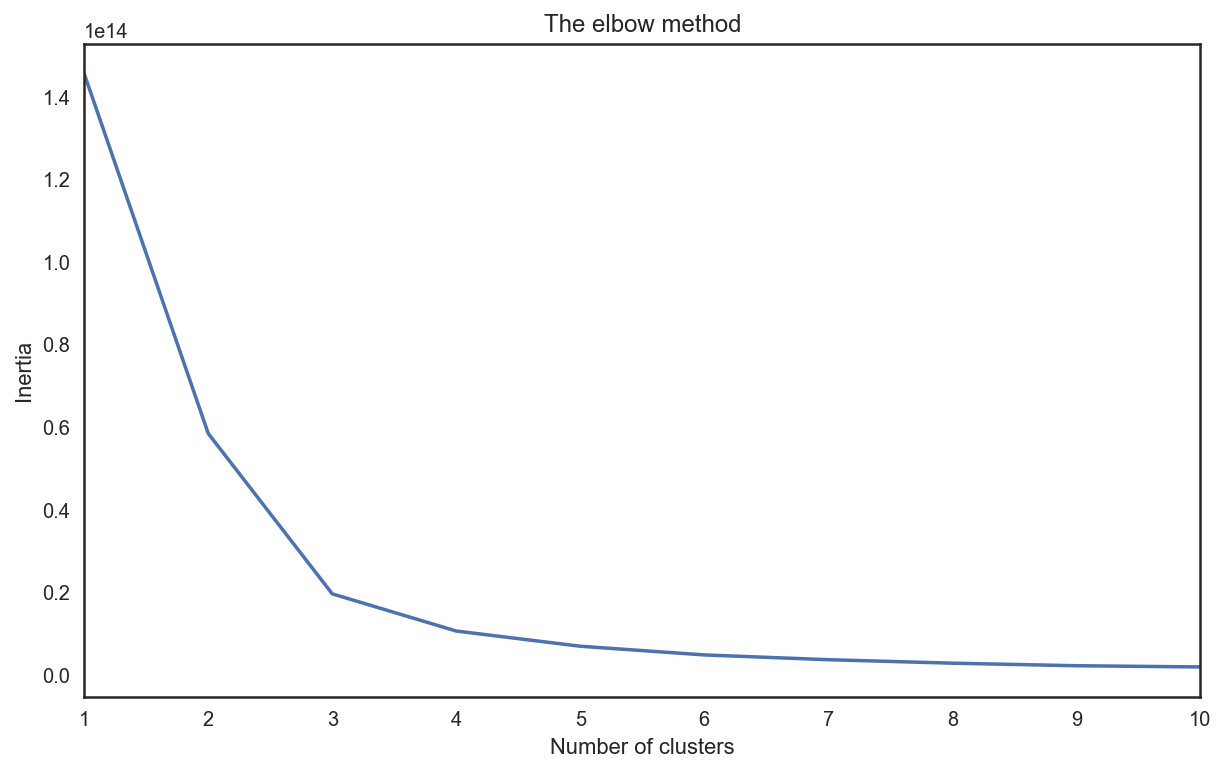

In [178]:
inertia = tdi.plot_inertia(df_cls_v)

In [180]:
k_means, clusters = tdi.cluster(df_cls_v, random_state=check_random_state(1), n_clusters=3)

In [181]:
df_cls_v['cluster'] = clusters
df_cls_v['cluster'].value_counts()

0    1598
2      21
1       1
Name: cluster, dtype: int64

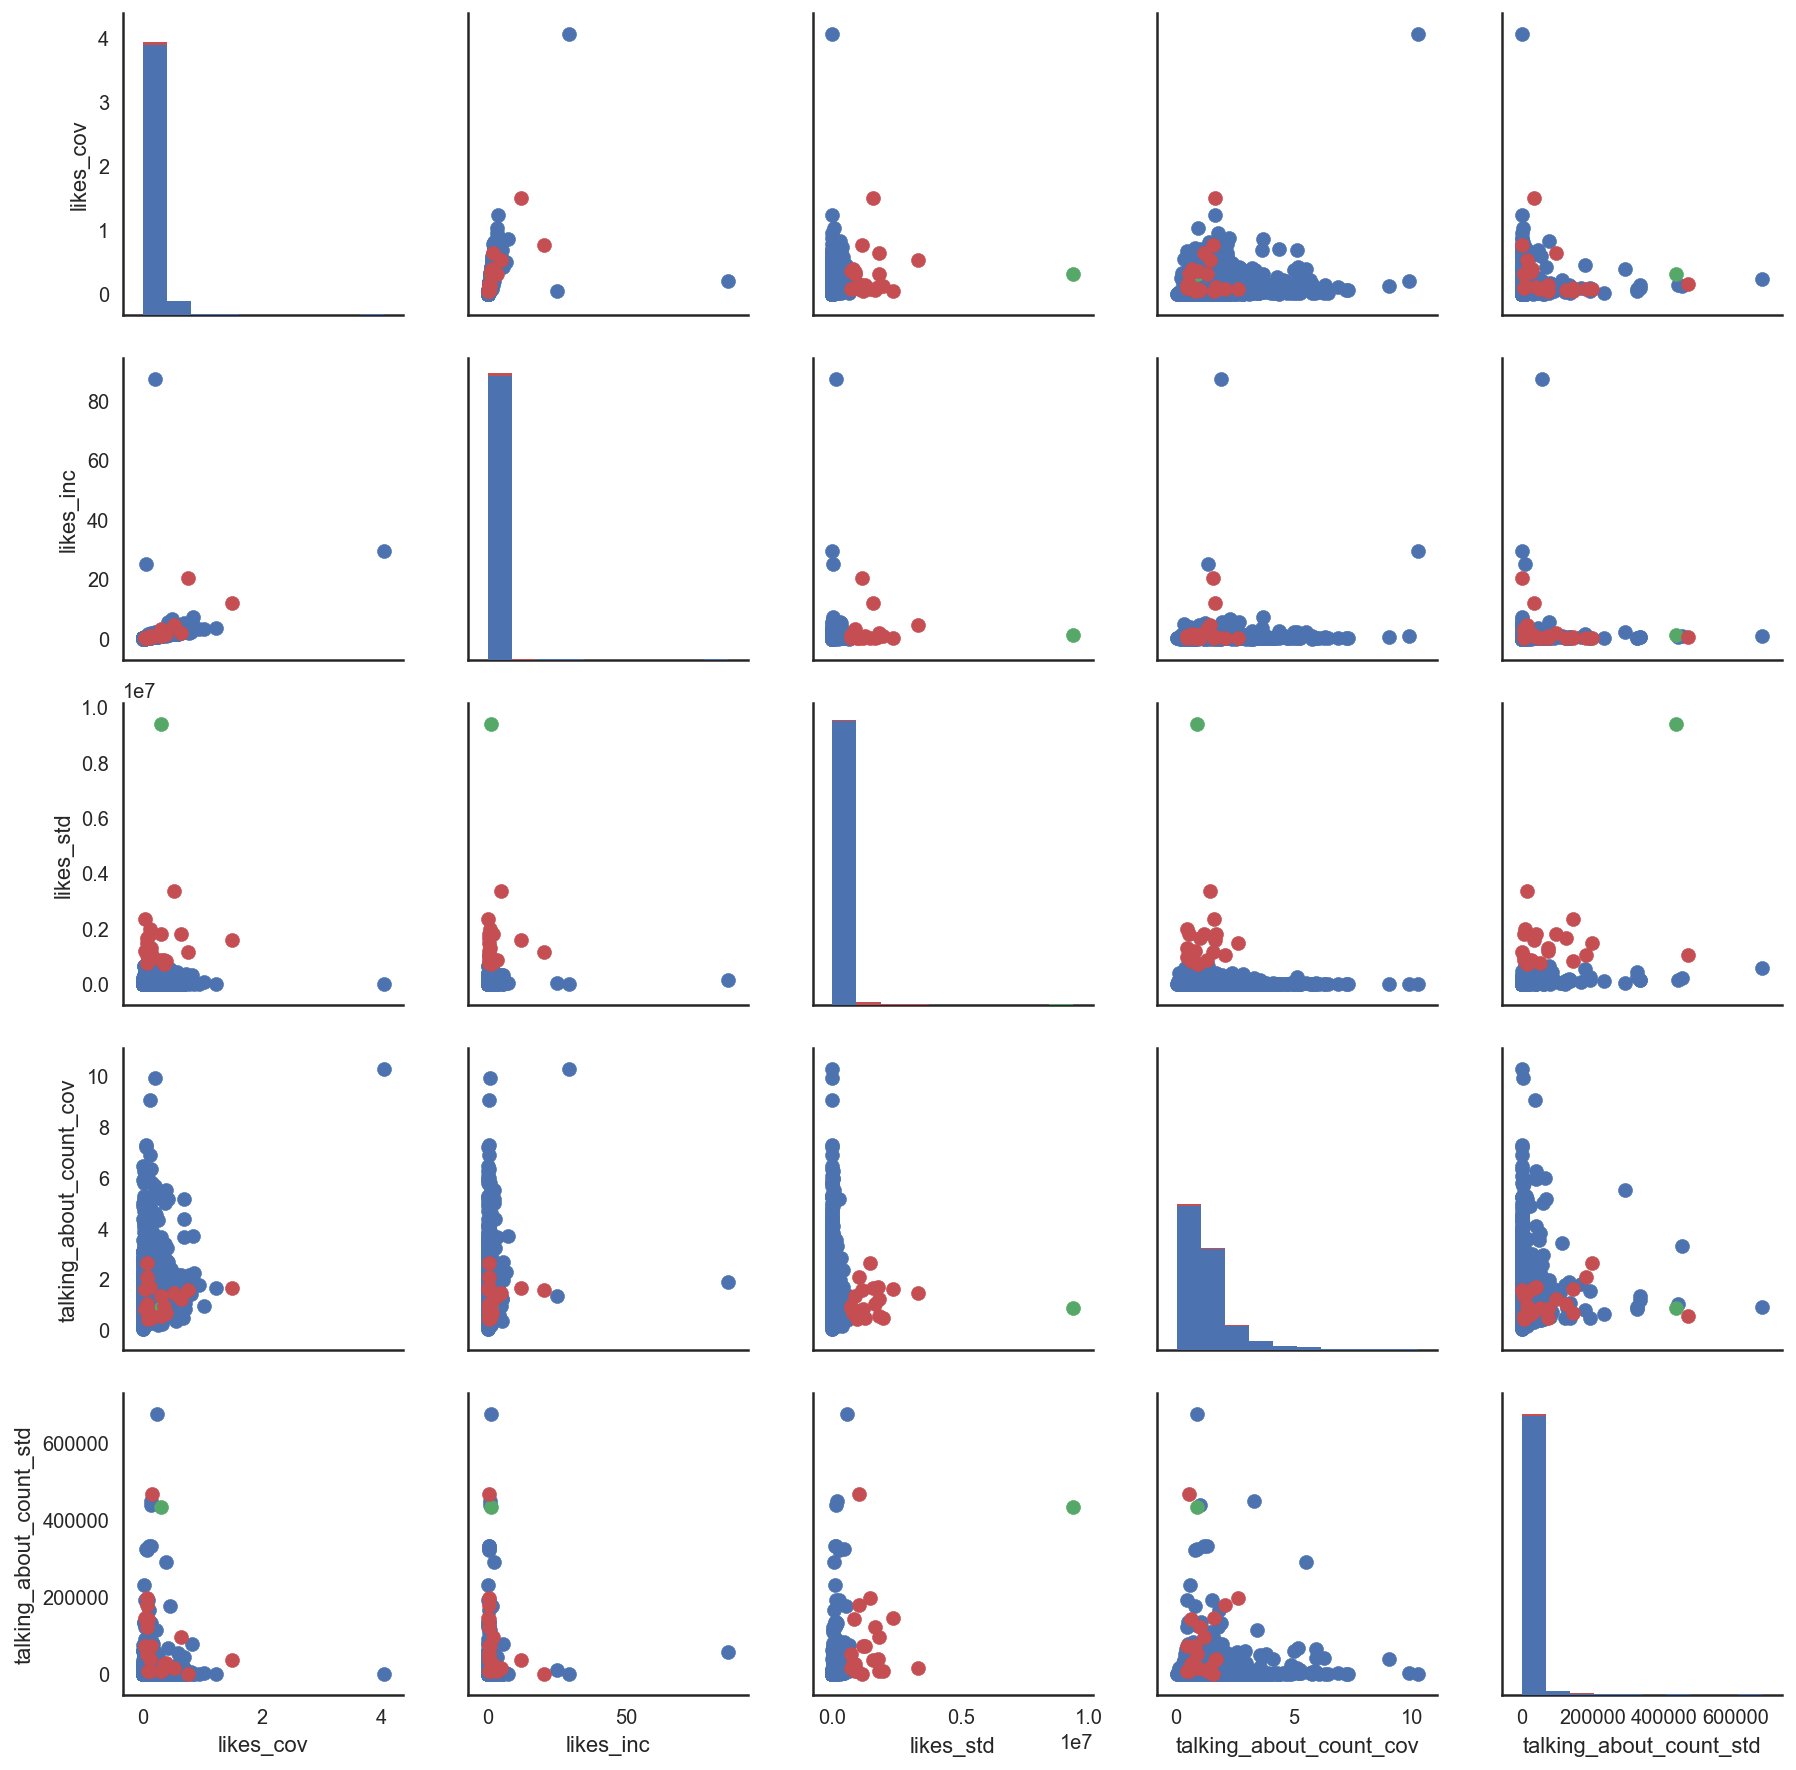

In [182]:
selected_cols = selected_features[0:8]
pg = tdi.plot_pair(df_cls_v, clusters, cols = selected_cols)

In [183]:
good = df_cls_v['cluster'] == 1
df_cls_v[good].index.tolist()

['NETFLIX']

In [184]:
good = df_cls_v['cluster'] == 2
df_cls_v[good].index.tolist()

['ALFA.ROMEO.CARS',
 'APPSTORE',
 'AVON',
 'BOOKINGCOM',
 'COLLEGEHUMOR',
 'COSTACRUISES.NA',
 'EROSNOW',
 'GOPRO',
 'GROUPON',
 'HASBROGAMING',
 'HOMEAWAY',
 'IMAX',
 'KSCLEANMASTER',
 'MARVEL',
 'NATGEOTVUS',
 'REVLON',
 'TATAMOTORSGROUP',
 'TRIVAGOUS',
 'TRIVAGOUSCA',
 'VIAJAVOLARIS',
 'VISAUNITEDSTATES']

In [185]:
selected_features2 = [
       'checkins_cov',
       'checkins_inc',
       'checkins_std',
       'likes_cov',
       'likes_inc',
       'likes_std',
       #'likes_mean',
       'talking_about_count_cov', 
       'talking_about_count_std', 
       #'talking_about_count_mean',
        ]

In [187]:
df_cls_p = df_p[selected_features2].replace([np.inf, -np.inf], np.nan)
df_cls_p.dropna(inplace=True)

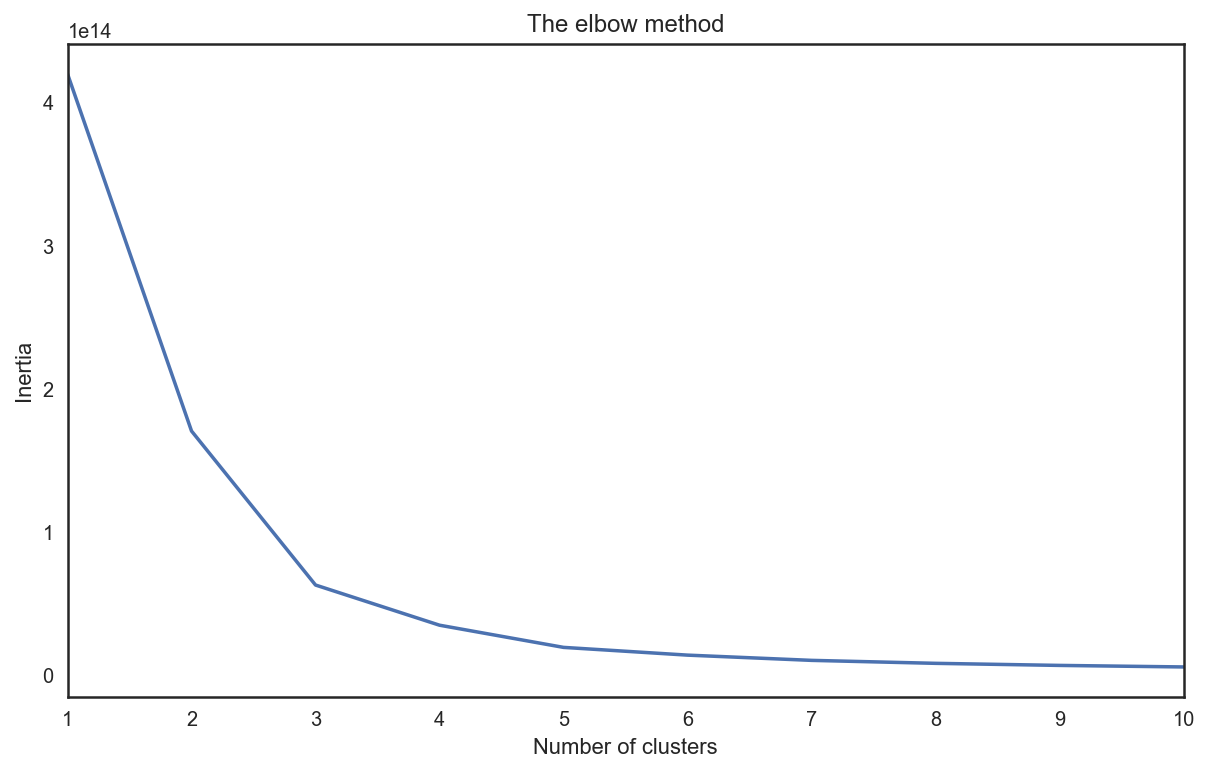

In [188]:
inertia = tdi.plot_inertia(df_cls_p)

In [189]:
k_means, clusters = tdi.cluster(df_cls_p, random_state=check_random_state(1), n_clusters=3)

In [190]:
df_cls_p['cluster'] = clusters
df_cls_p['cluster'].value_counts()

0    2722
2      16
1       1
Name: cluster, dtype: int64

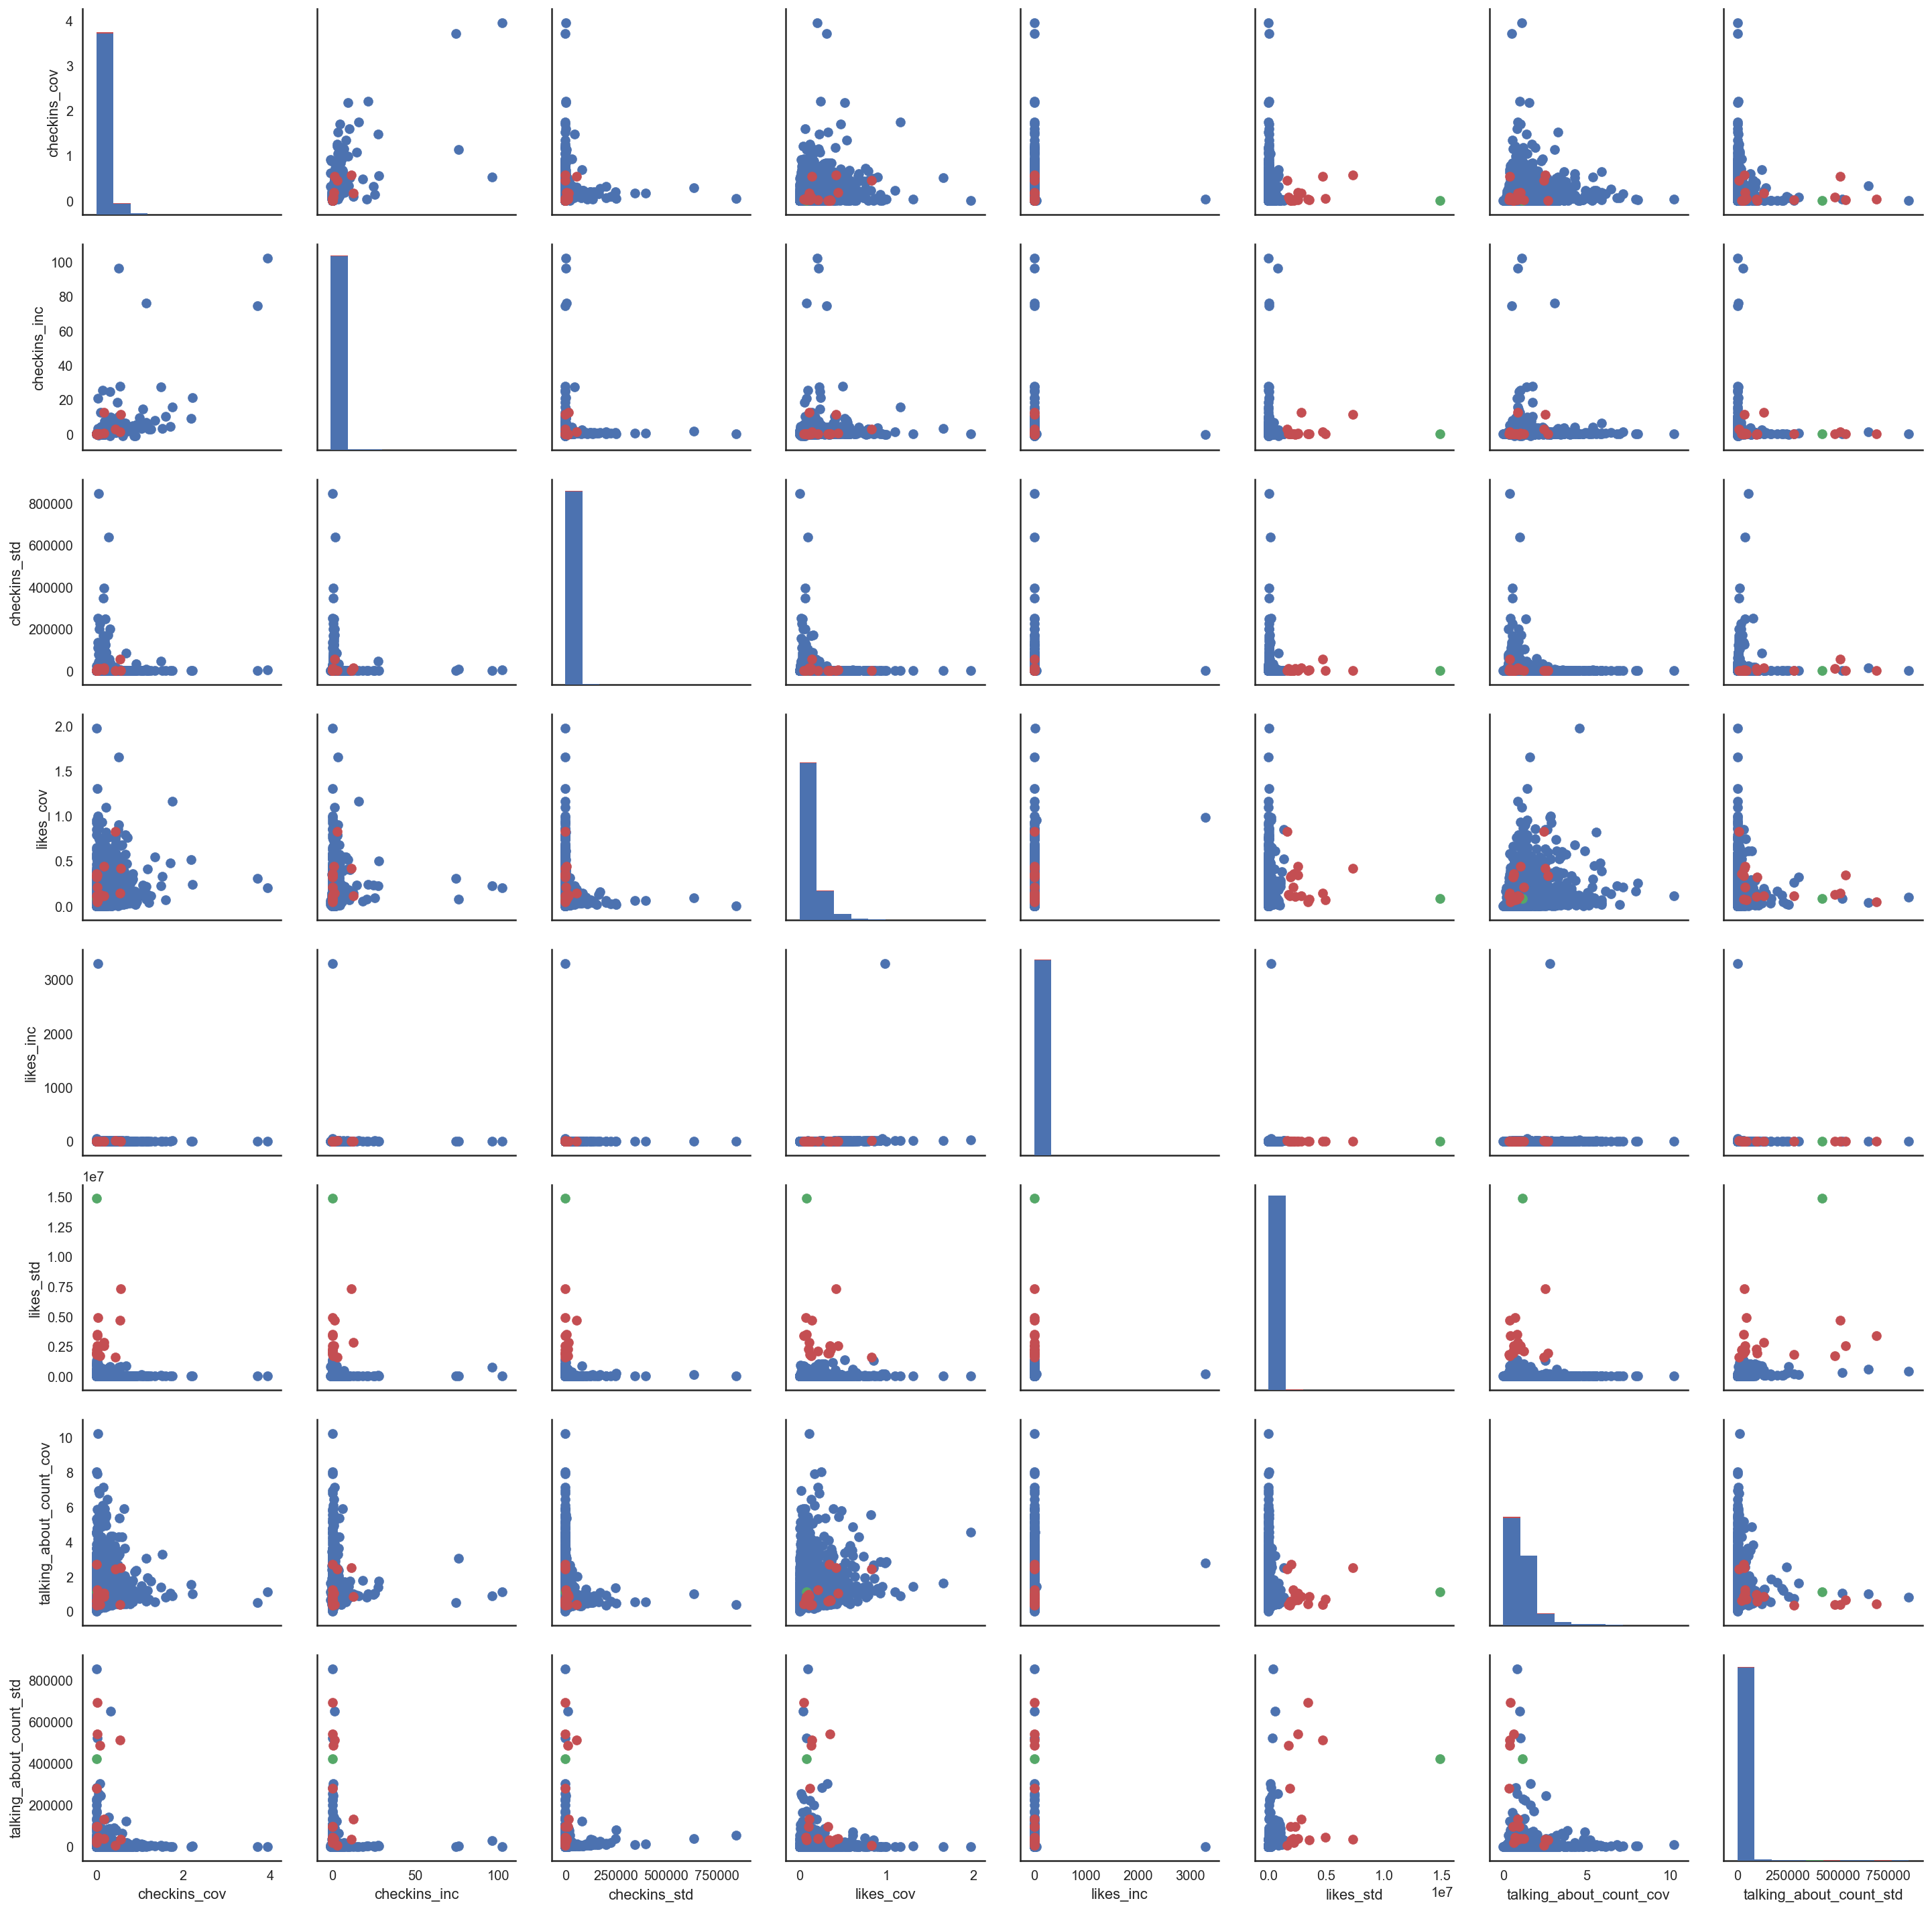

In [191]:
selected_cols = selected_features2[0:8]
pg = tdi.plot_pair(df_cls_p, clusters, cols = selected_cols)

In [192]:
good = df_cls_p['cluster'] == 1
df_cls_p[good].index.tolist()

['FACEBOOK']

In [193]:
good = df_cls_p['cluster'] == 2
df_cls_p[good].index.tolist()

['CASTROLUSA',
 'ESPN',
 'FORD',
 'GOOGLE',
 'KFC',
 'MANCHESTERUNITED',
 'MCDONALDSUS',
 'MERCADOLIBRE',
 'MICROSOFT',
 'NIKE',
 'NYTIMES',
 'ORANGE',
 'TOTAL',
 'UNDERARMOUR',
 'USATODAY',
 'WWE']

### PCA Analysis

In [124]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit model to the data
pca.fit(df_cls)

# We can print out rotation matrix and variance associated with each
# projected dimension

vars = pca.explained_variance_ratio_

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, selected_cols))
    print(output)

Variance:  Projected dimension
------------------------------
99.2%:     0.00 * likes_cov +  0.00 * likes_inc +  1.00 * likes_std + -0.00 * talking_about_count_cov +  0.04 * talking_about_count_std
 0.8%:    -0.00 * likes_cov + -0.00 * likes_inc + -0.04 * likes_std +  0.00 * talking_about_count_cov +  1.00 * talking_about_count_std
 0.0%:    -0.00 * likes_cov + -1.00 * likes_inc +  0.00 * likes_std + -0.00 * talking_about_count_cov + -0.00 * talking_about_count_std
 0.0%:     0.03 * likes_cov + -0.00 * likes_inc +  0.00 * likes_std +  1.00 * talking_about_count_cov + -0.00 * talking_about_count_std
 0.0%:    -0.06 * likes_cov +  0.00 * likes_inc +  0.00 * likes_std + -0.01 * talking_about_count_cov +  0.00 * talking_about_count_std
 0.0%:    -1.00 * likes_cov +  0.00 * likes_inc +  0.00 * likes_std +  0.03 * talking_about_count_cov + -0.00 * talking_about_count_std


In [125]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df_cls)

In [126]:
pca_reduced = pd.DataFrame(data_reduced)

In [127]:
pca_reduced.columns = ['PC1','PC2']

In [128]:
pca_reduced['user'] = df_cls.index

In [129]:
pca_reduced.shape

(4876, 3)

In [130]:
pca_reduced['cluster'] = clusters

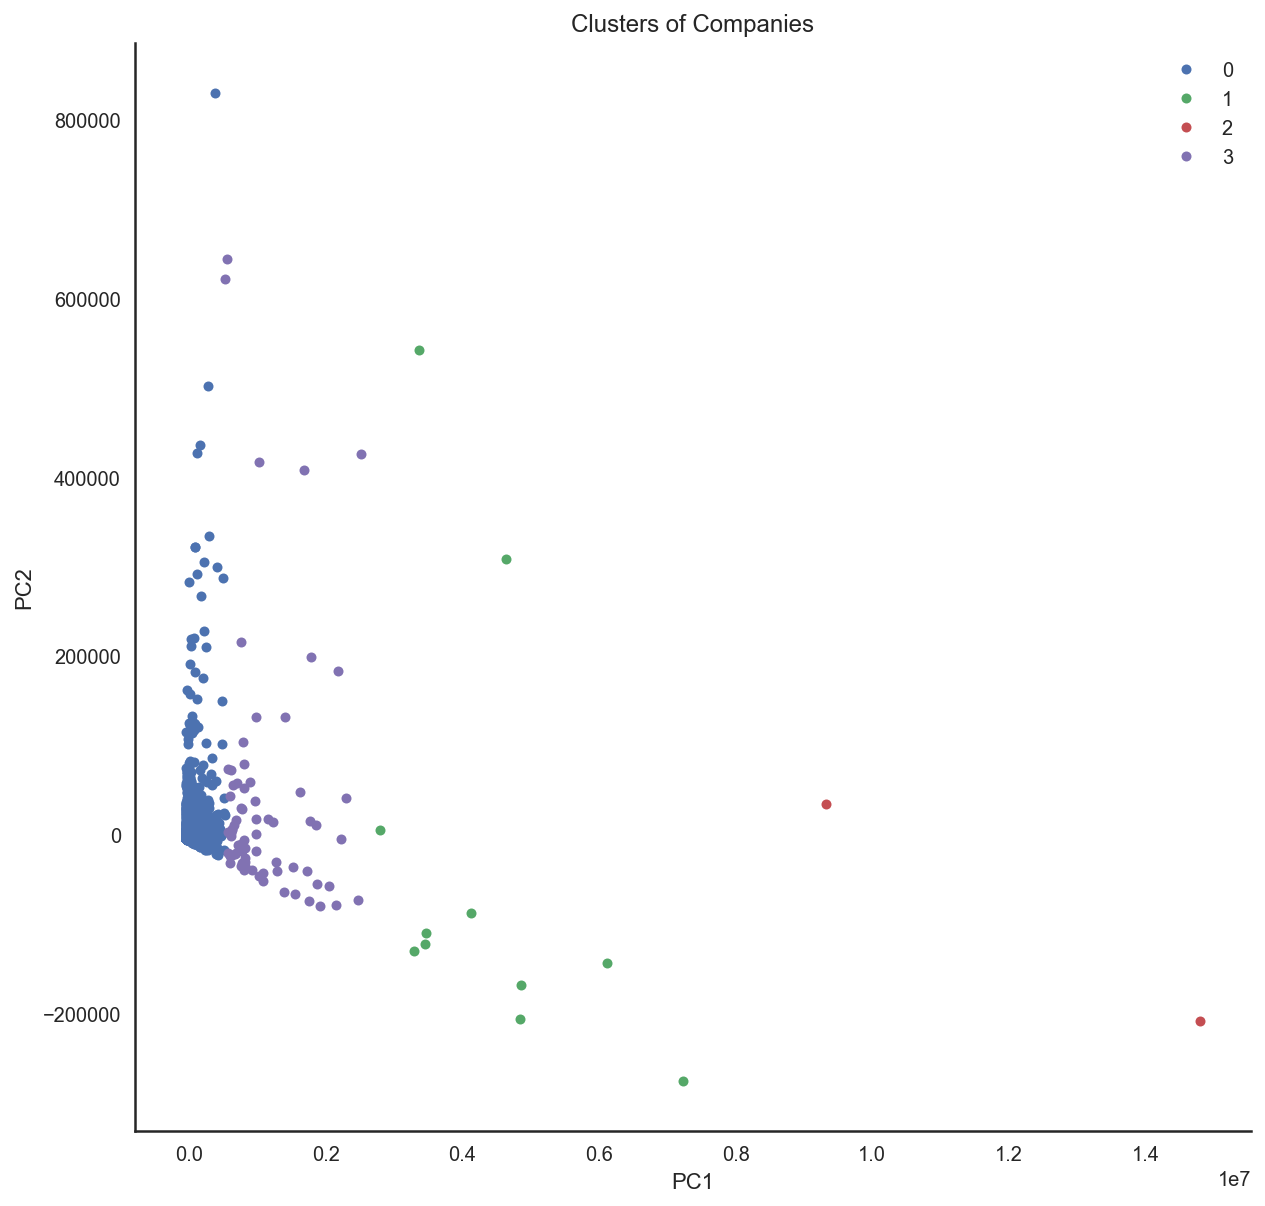

In [133]:
groups = pca_reduced.groupby(['cluster'])

# Plot
fig, ax = plt.subplots(figsize = (10,10))

for name, group in groups:
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=5, label=name)

ax.set_title("Clusters of Companies")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")    
ax.legend()
sns.despine()

In [ ]:
crosstab(facebook3)